# Tito Nicola Drugman - 502252 - Churn

Dataset: https://www.kaggle.com/c/customer-churn-prediction-2020/overview

Dataset Glossary (Column-wise)
* state - string. 2-letter code of the US state of customer residence
* account_length - numerical. Number of months the customer has been with the current telco provider
* area_code - string="area_code_AAA" where AAA = 3 digit area code.
* international_plan - (yes/no). The customer has international plan.
* voice_mail_plan - (yes/no). The customer has voice mail plan.
* number_vmail_messages - numerical. Number of voice-mail messages.
* total_day_minutes - numerical. Total minutes of day calls.
* total_day_calls - numerical. Total minutes of day calls.
* total_day_charge -numerical. Total charge of day calls.
* total_eve_minutes - numerical. Total minutes of evening calls.
* total_eve_calls - numerical. Total number of evening calls.
* total_eve_charge - numerical. Total charge of evening calls.
* total_night_minutes - numerical. Total minutes of night calls.
* total_night_calls - numerical. Total number of night calls.
* total_night_charge - numerical. Total charge of night calls.
* total_intl_minutes - numerical. Total minutes of international calls.
* total_intl_calls - numerical. Total number of international calls.
* total_intl_charge - numerical. Total charge of international calls
* number_customer_service_calls - numerical. Number of calls to customer service
* churn - (yes/no). Customer churn - target variable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.utils import shuffle
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import xgboost as xgb
from hyperopt import hp, STATUS_OK, Trials, fmin, tpe
from hyperopt.pyll.stochastic import sample

pd.options.display.float_format = '{:.2f}'.format

In [2]:
df_raw = pd.read_csv('train.csv')
df_raw = shuffle(df_raw, random_state=42)

# Preprocessing

In [3]:
df_raw.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1024,KS,36,area_code_510,no,no,0,178.60,83,30.36,213.10,103,18.11,198.00,119,8.91,10.90,5,2.94,1,no
2177,MT,16,area_code_510,no,no,0,153.20,65,26.04,229.70,90,19.52,148.20,94,6.67,10.70,8,2.89,1,no
1444,NE,99,area_code_415,no,no,0,200.00,66,34.00,107.90,104,9.17,233.70,82,10.52,11.40,2,3.08,3,no
3386,OH,159,area_code_510,no,no,0,168.50,80,28.65,203.90,119,17.33,199.10,126,8.96,8.10,2,2.19,1,no
3203,NY,77,area_code_510,no,no,0,124.10,92,21.10,214.90,131,18.27,241.30,132,10.86,13.70,3,3.70,0,no
721,HI,169,area_code_415,no,no,0,179.20,111,30.46,175.20,130,14.89,228.60,92,10.29,9.90,6,2.67,2,no
3516,NH,138,area_code_415,no,no,0,157.50,96,26.78,271.70,107,23.09,138.20,84,6.22,10.70,6,2.89,2,no
1113,MT,10,area_code_510,no,no,0,183.00,103,31.11,214.80,77,18.26,206.40,73,9.29,8.70,6,2.35,2,no
1138,SD,98,area_code_415,no,no,0,0.00,0,0.00,159.60,130,13.57,167.10,88,7.52,6.80,1,1.84,4,yes
2528,NY,131,area_code_408,yes,no,0,122.30,83,20.79,118.80,94,10.10,147.90,95,6.66,13.70,3,3.70,3,yes


In [4]:
df_raw.shape

(4250, 20)

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4250 entries, 1024 to 860
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   floa

<Axes: >

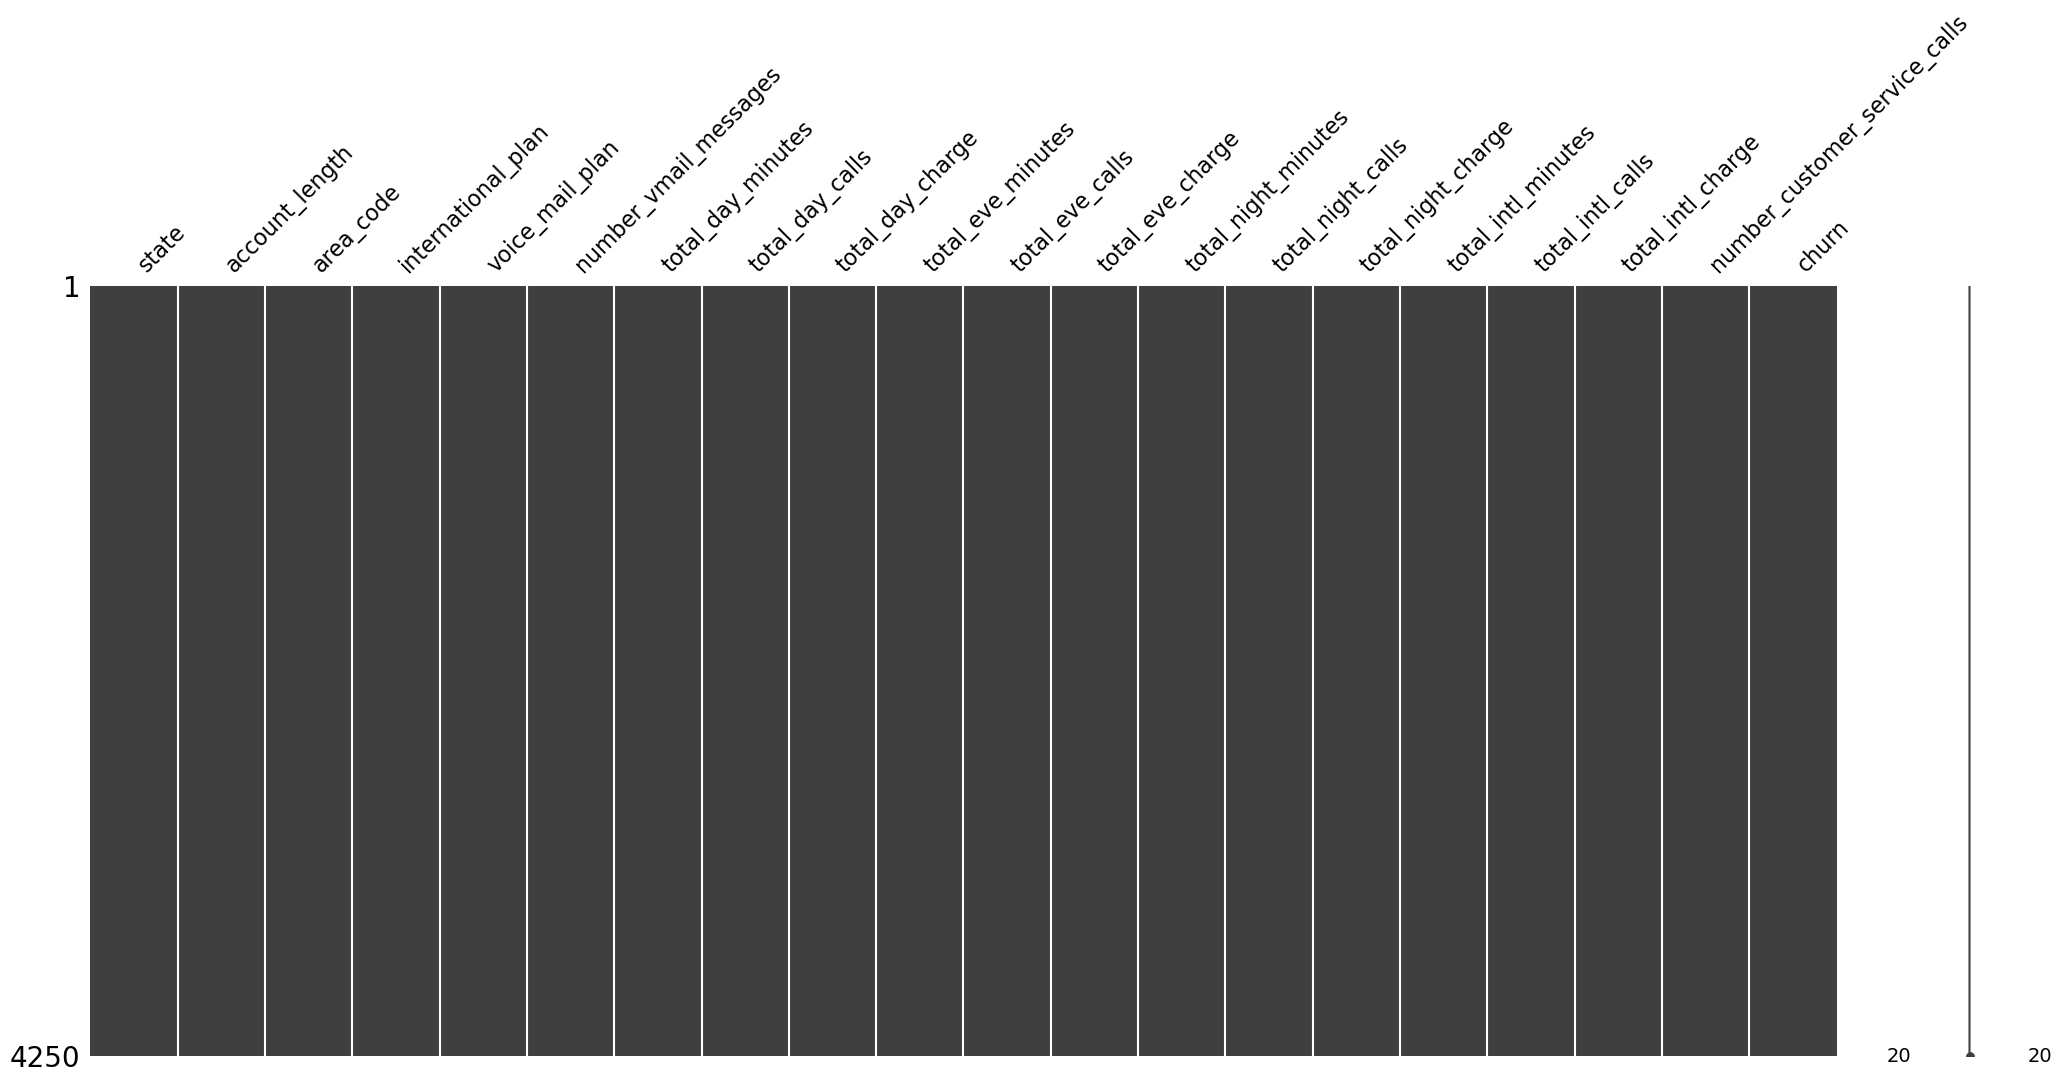

In [6]:
msno.matrix(df_raw)

In [7]:
df_raw.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00
mean,100.24,7.63,180.26,99.91,30.64,200.17,100.18,17.02,200.53,99.84,9.02,10.26,4.43,2.77,1.56
std,39.70,13.44,54.01,19.85,9.18,50.25,19.91,4.27,50.35,20.09,2.27,2.76,2.46,0.75,1.31
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,73.00,0.00,143.33,87.00,24.36,165.93,87.00,14.10,167.22,86.00,7.52,8.50,3.00,2.30,1.00
50%,100.00,0.00,180.45,100.00,30.68,200.70,100.00,17.06,200.45,100.00,9.02,10.30,4.00,2.78,1.00
75%,127.00,16.00,216.20,113.00,36.75,233.78,114.00,19.87,234.70,113.00,10.56,12.00,6.00,3.24,2.00
max,243.00,52.00,351.50,165.00,59.76,359.30,170.00,30.54,395.00,175.00,17.77,20.00,20.00,5.40,9.00


In [8]:
df_raw.duplicated().sum()

0

In [9]:
df_clean = df_raw.copy()

In [10]:
categorical_cols = (df_clean.dtypes[df_raw.dtypes == 'object'].index)
numerical_cols = (df_clean.dtypes[df_raw.dtypes != 'object'].index)

# NUMERICAL COLUMNS

In [11]:
print(numerical_cols)

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')


In [12]:
def num_plot_count(df, column_name, figsize=(21, 9), color='blue', style='ggplot'):
    plt.figure(figsize=figsize)
    plt.style.use(style)
    sns.countplot(x=column_name, data=df, color=color)
    plt.xlabel(column_name.capitalize())
    plt.ylabel('Observations')
    plt.title(f'Number of Observations by {column_name.capitalize()}')
    plt.show()


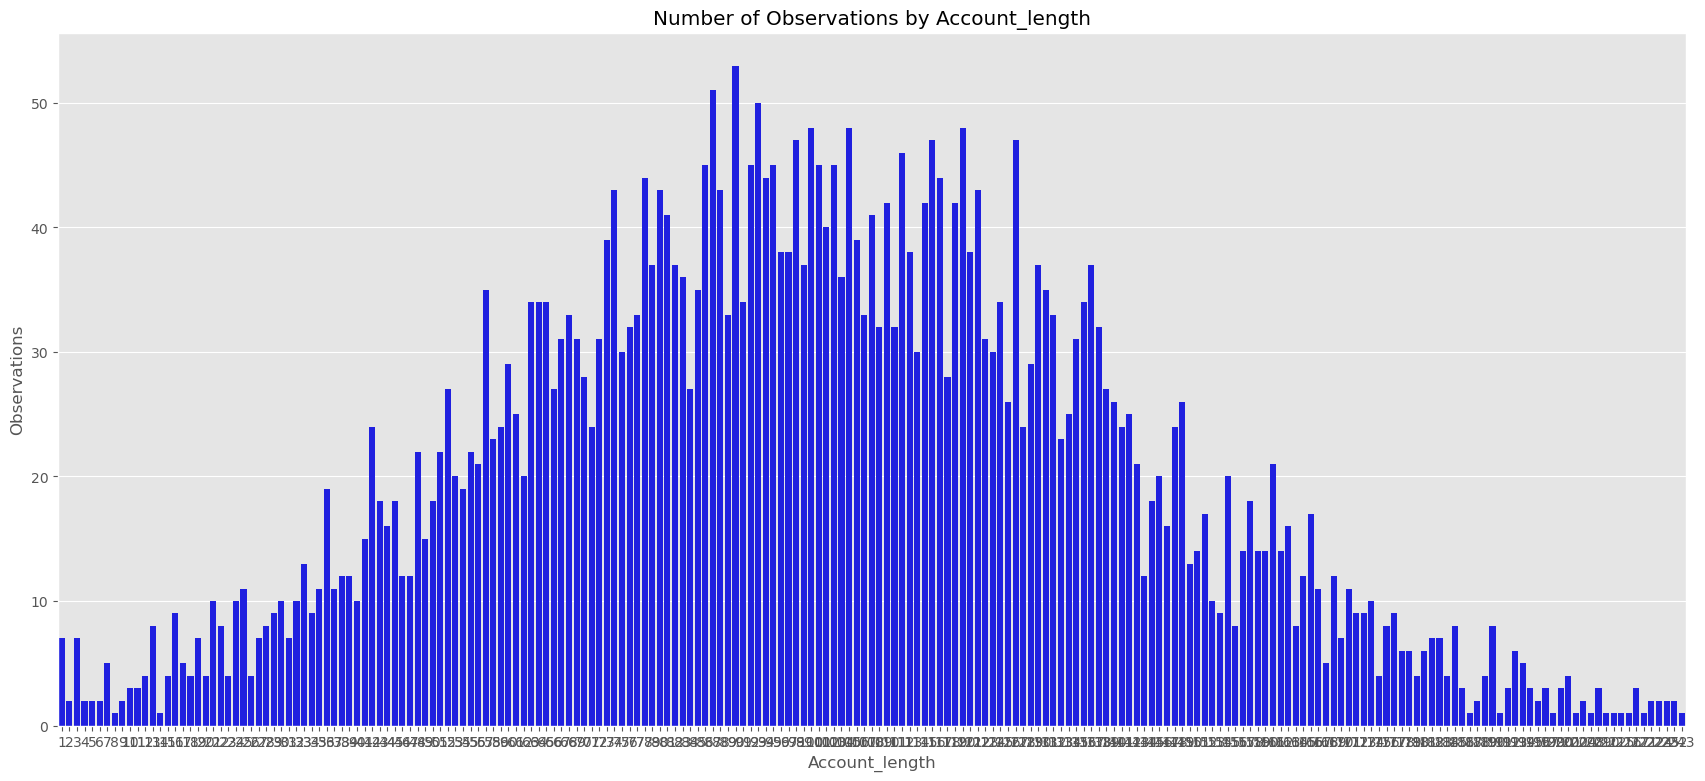

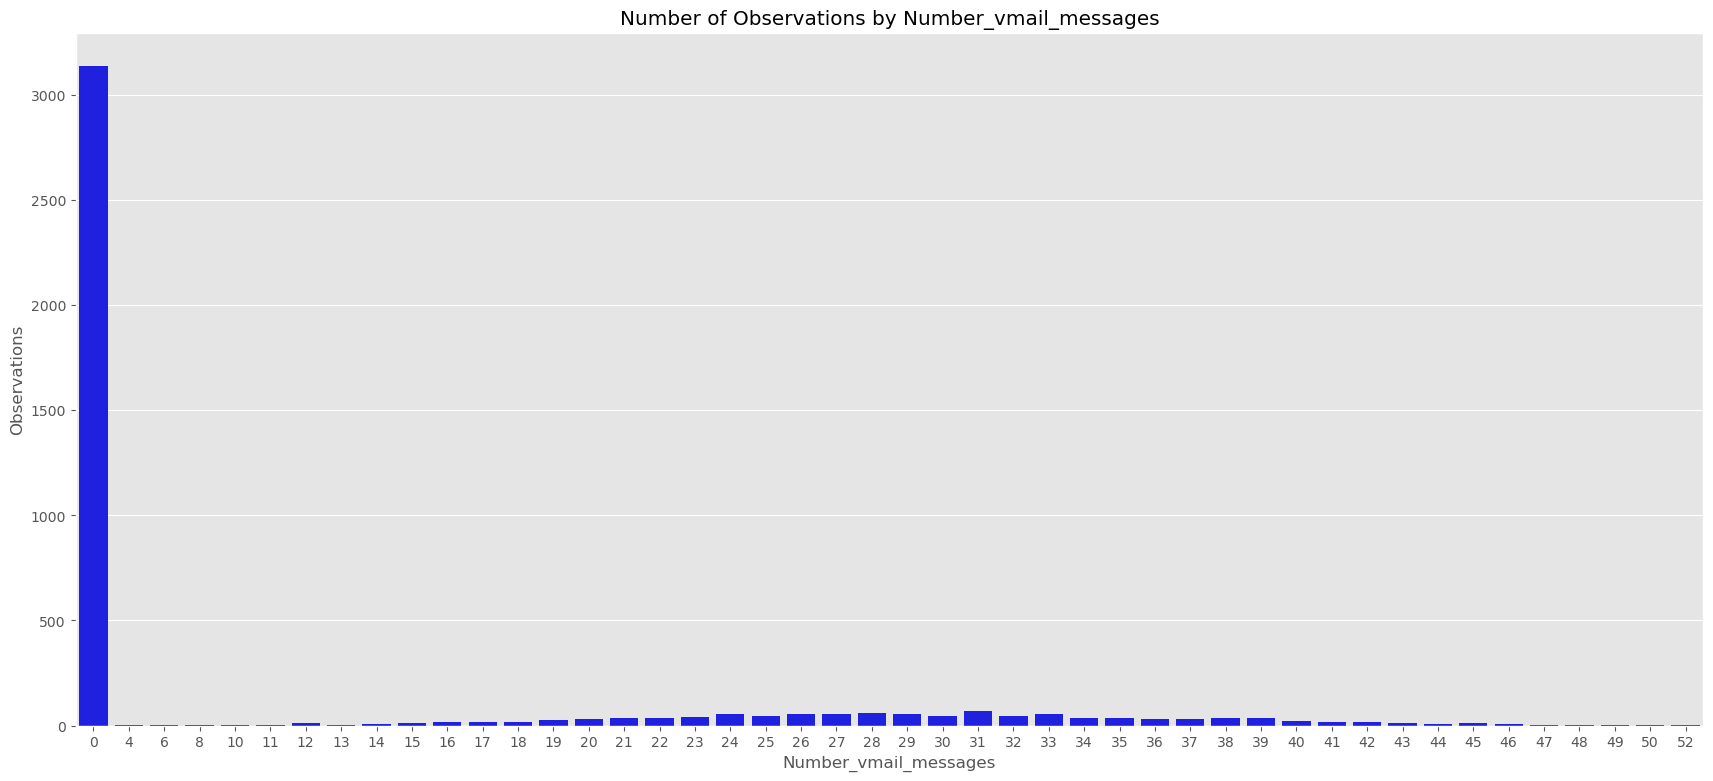

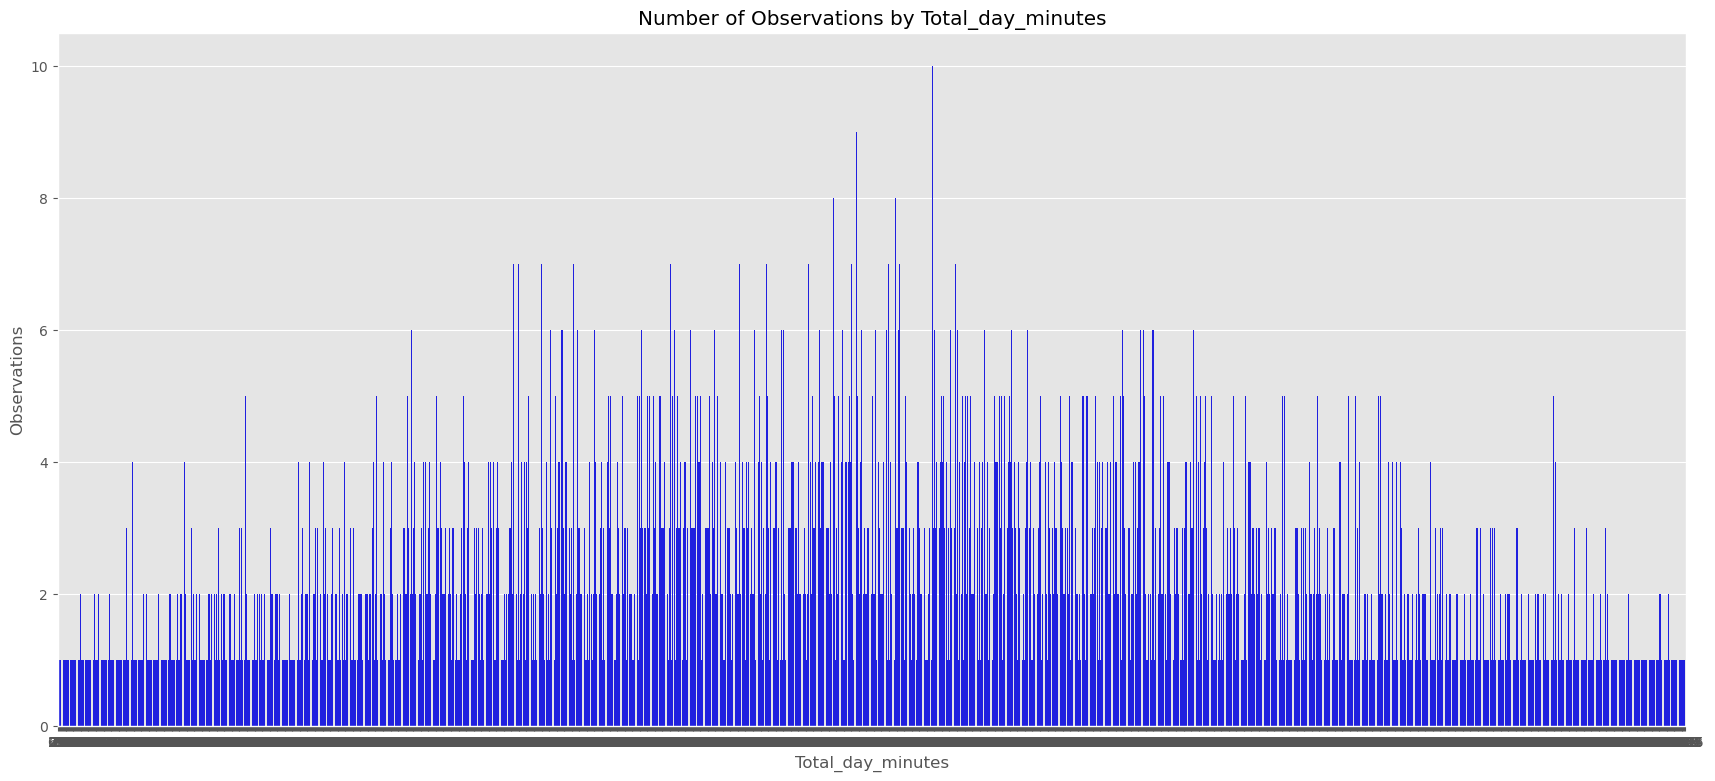

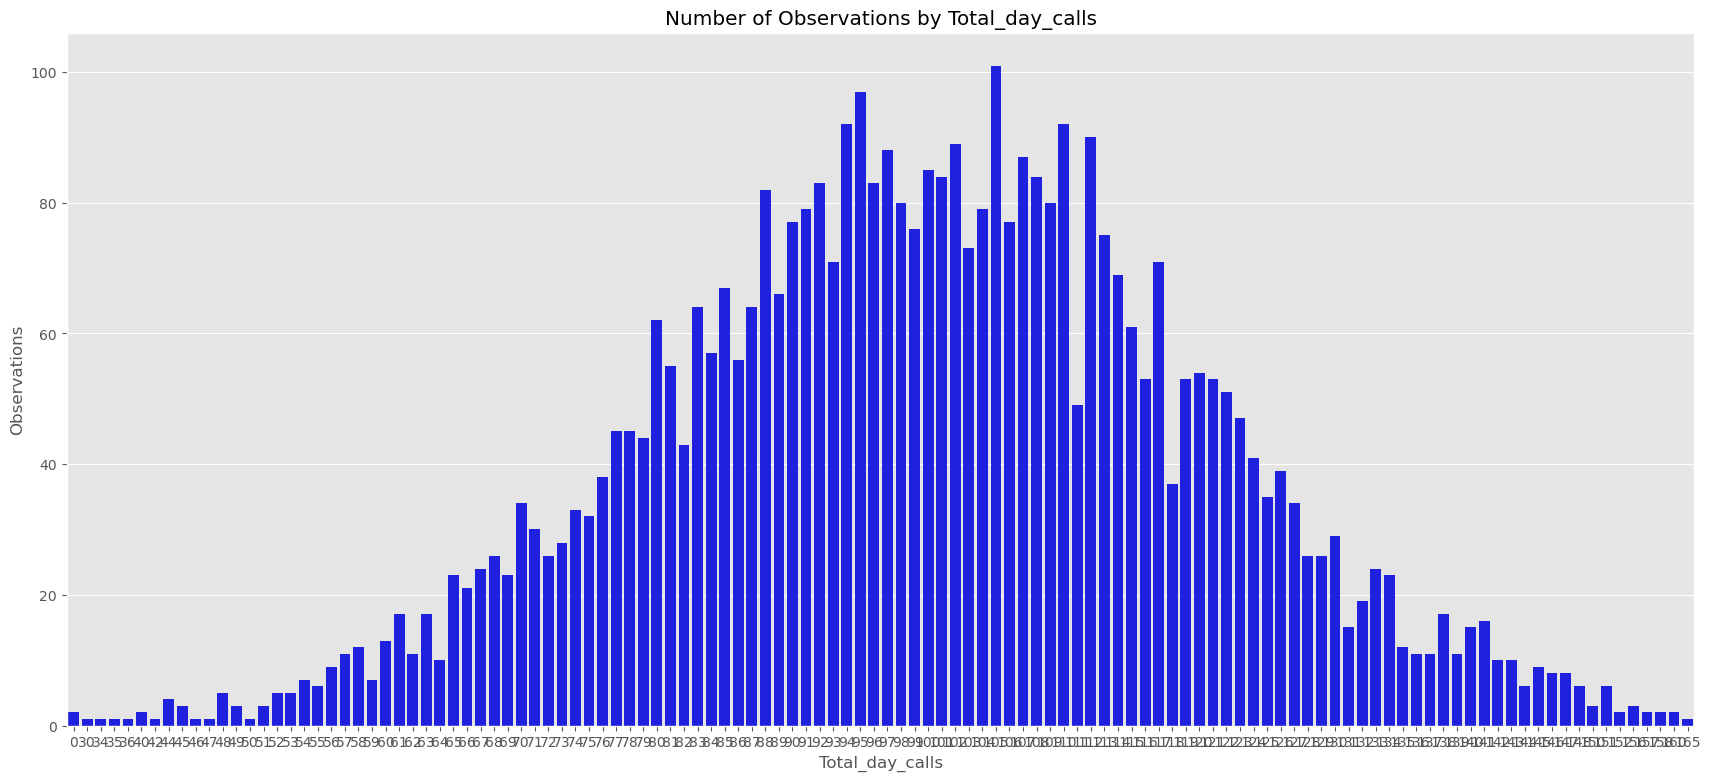

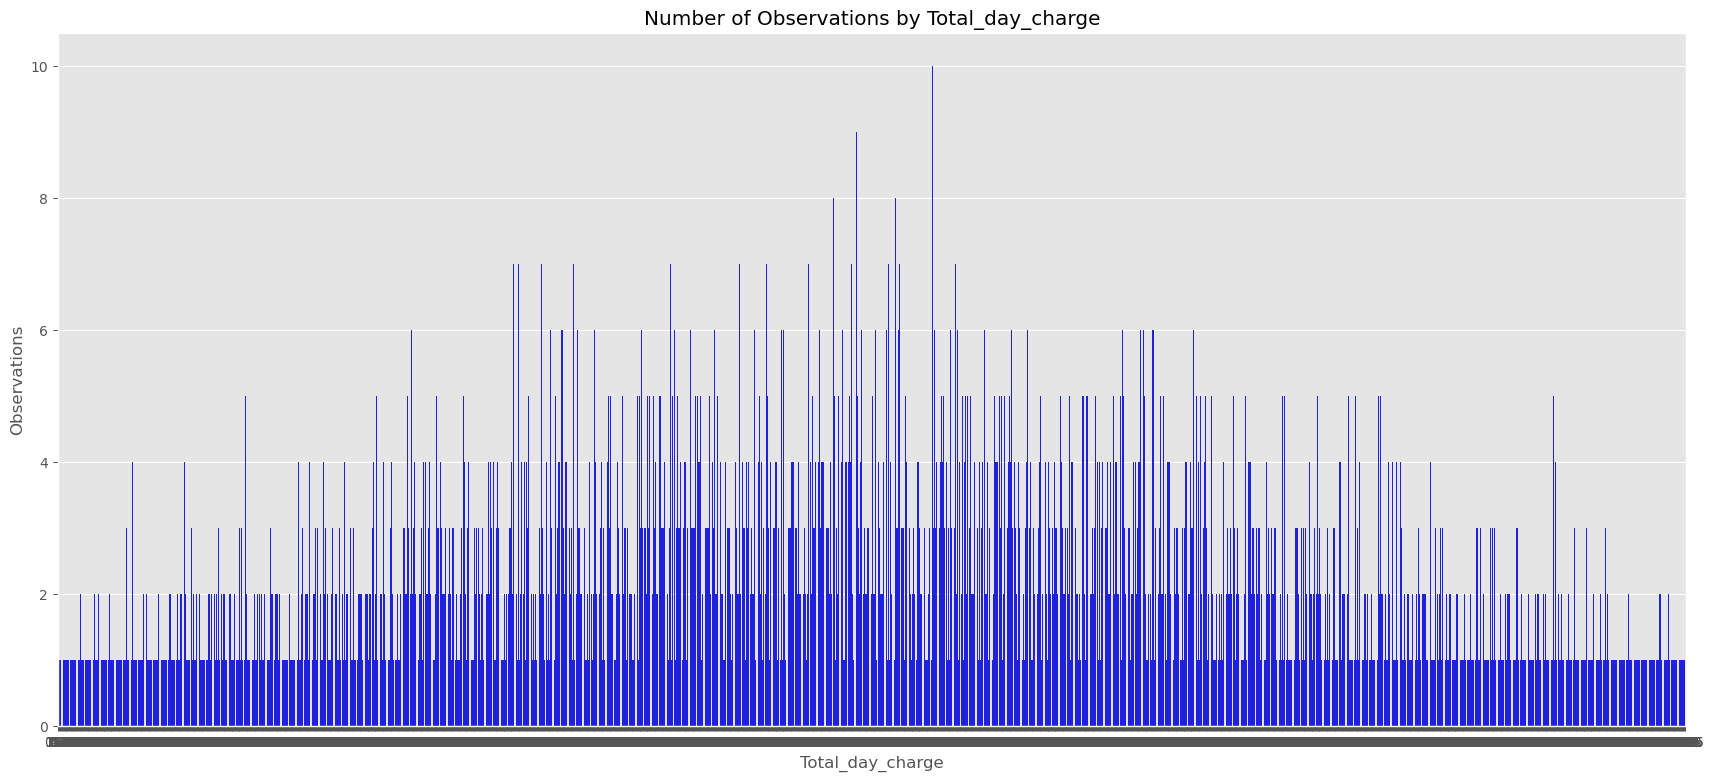

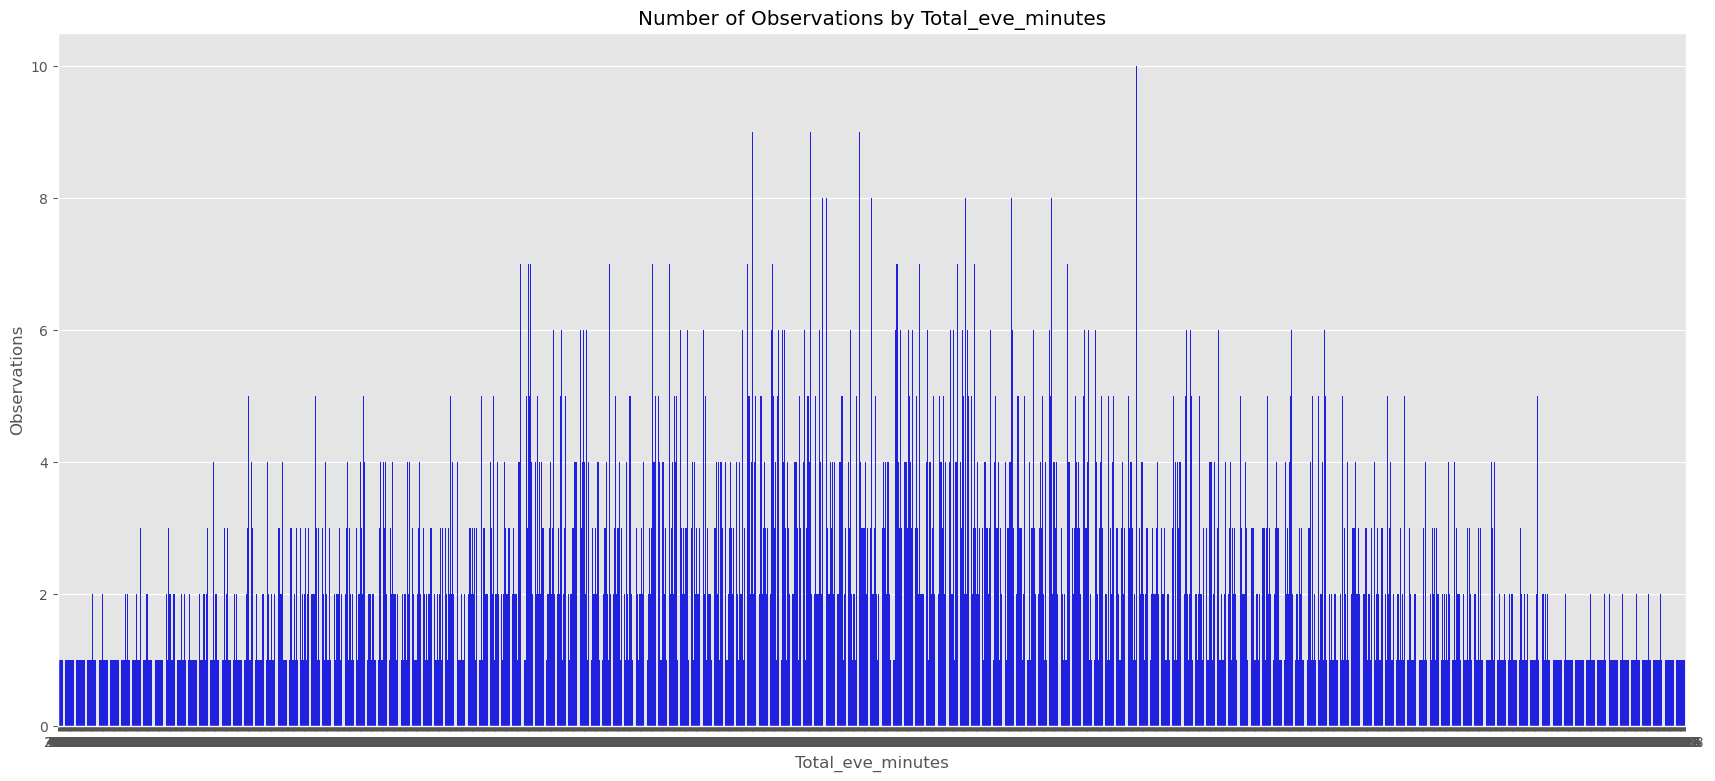

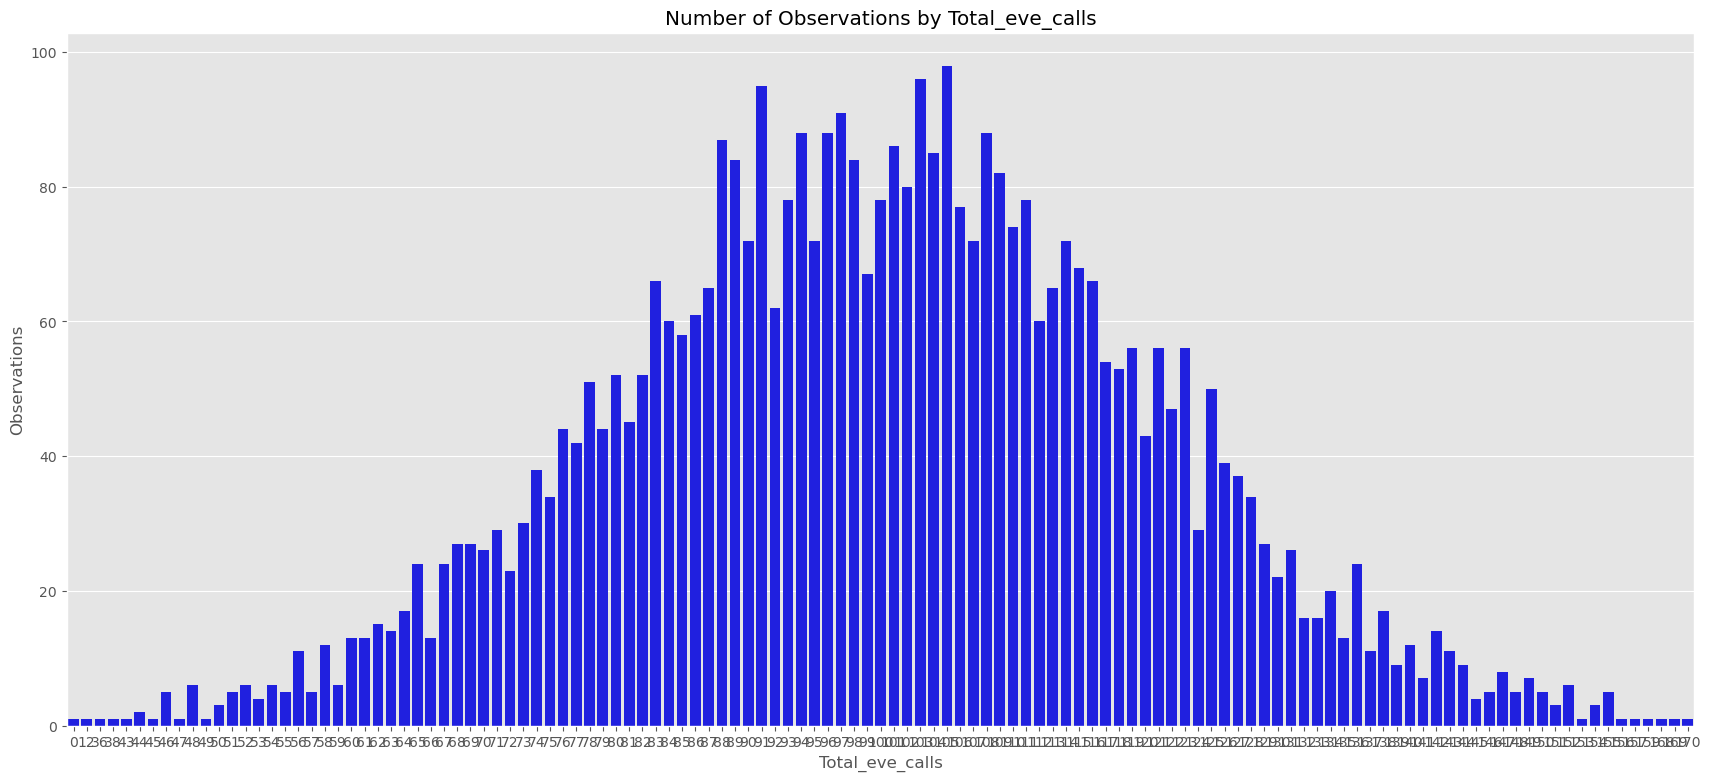

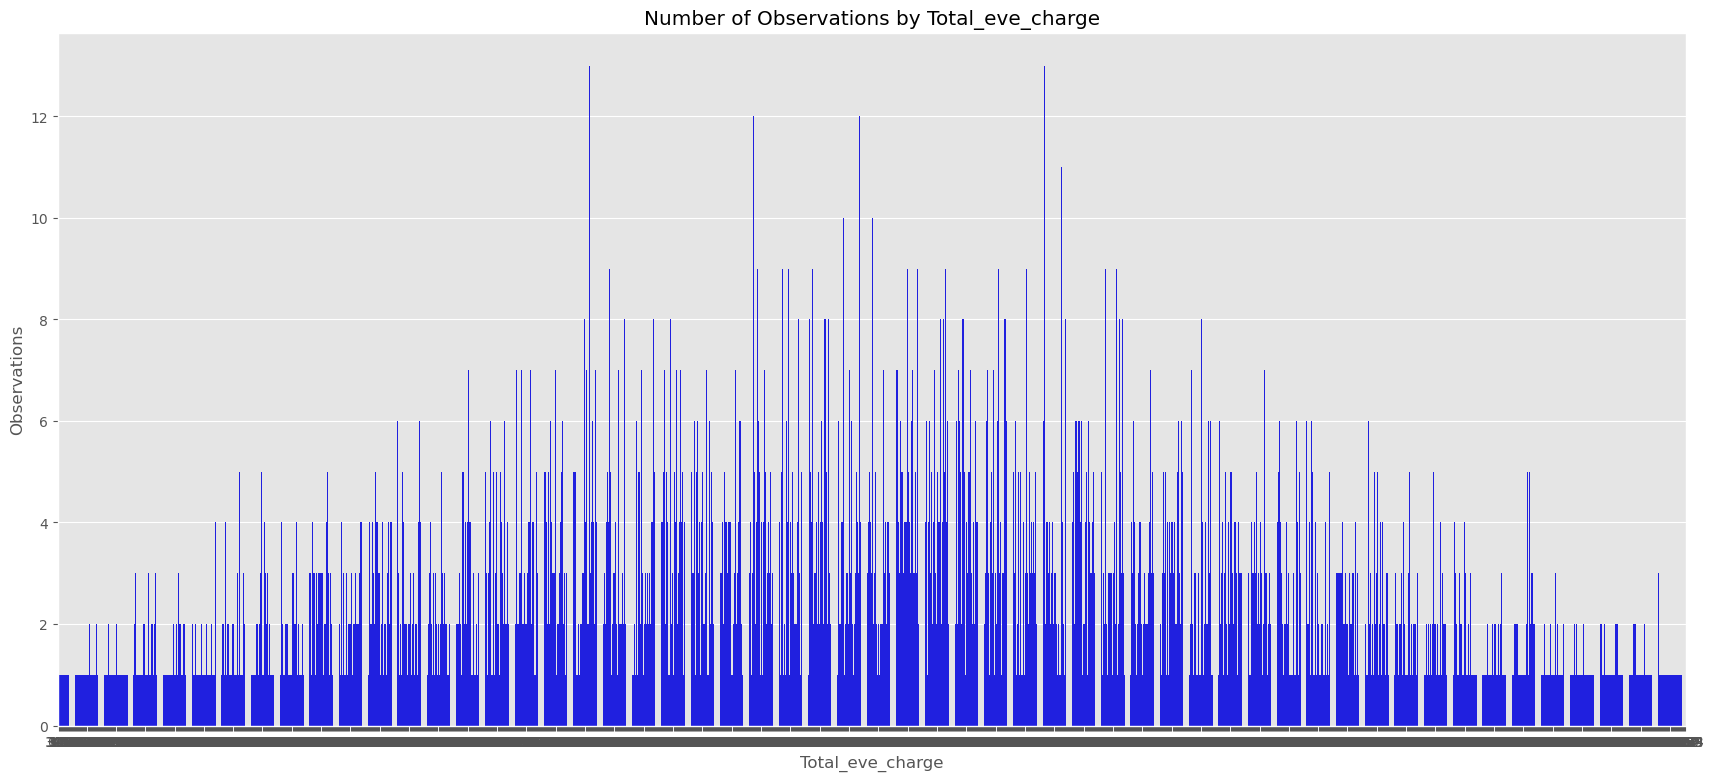

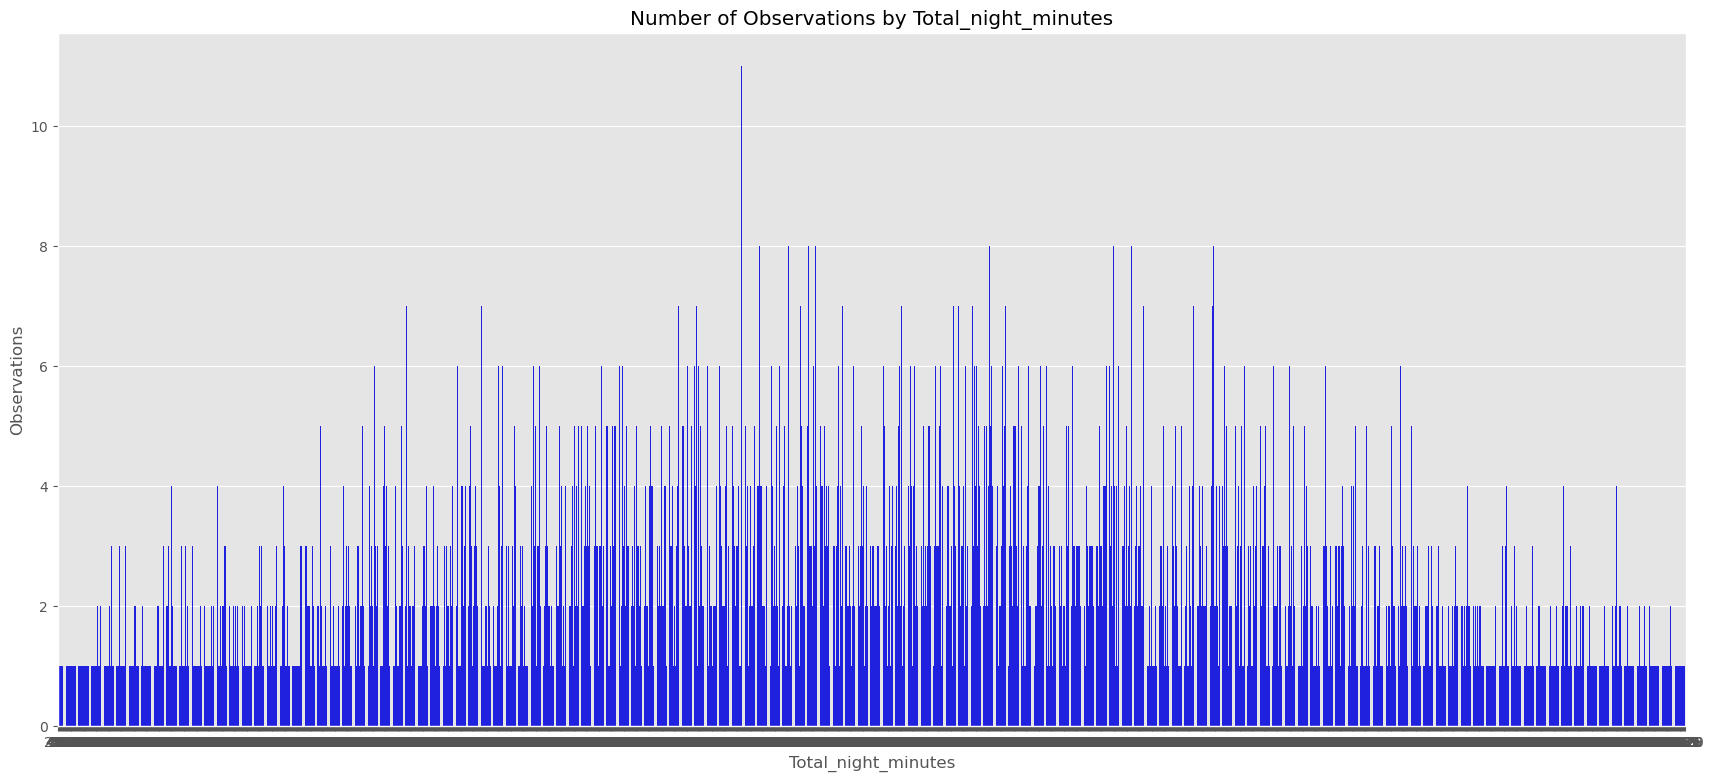

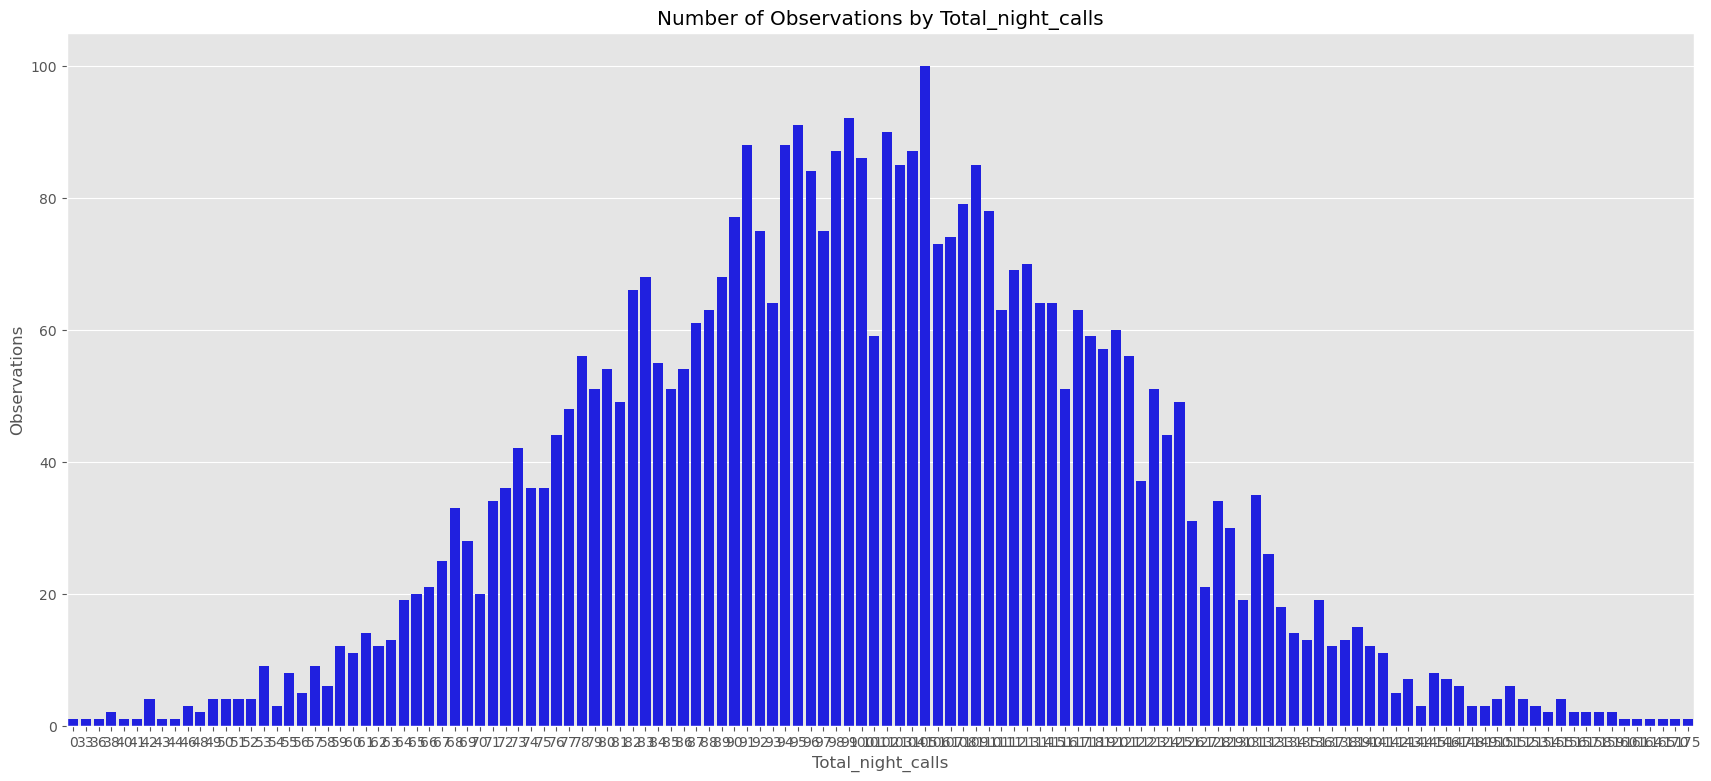

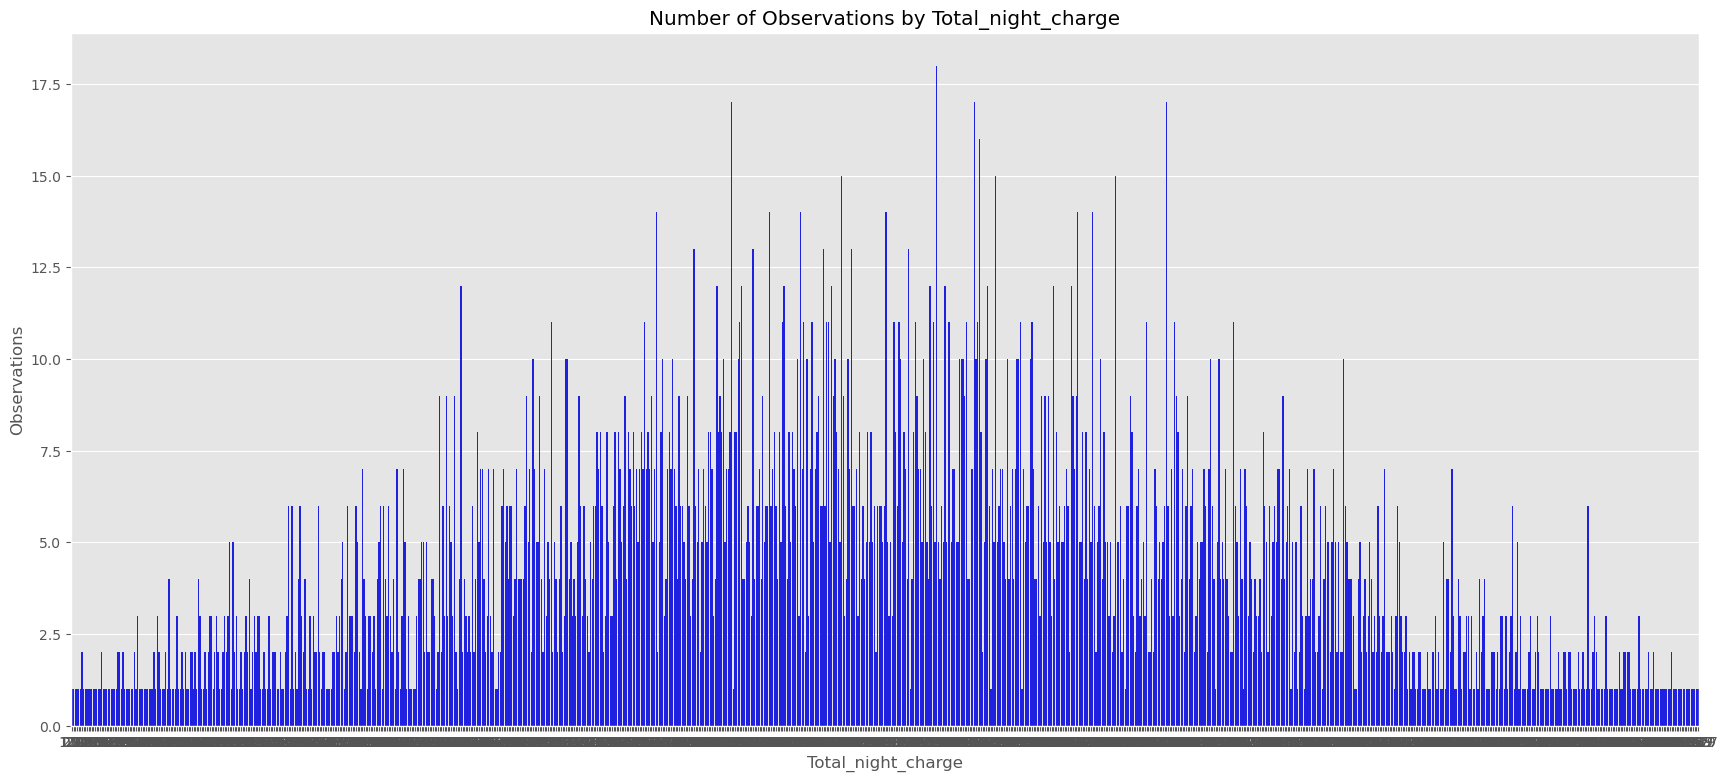

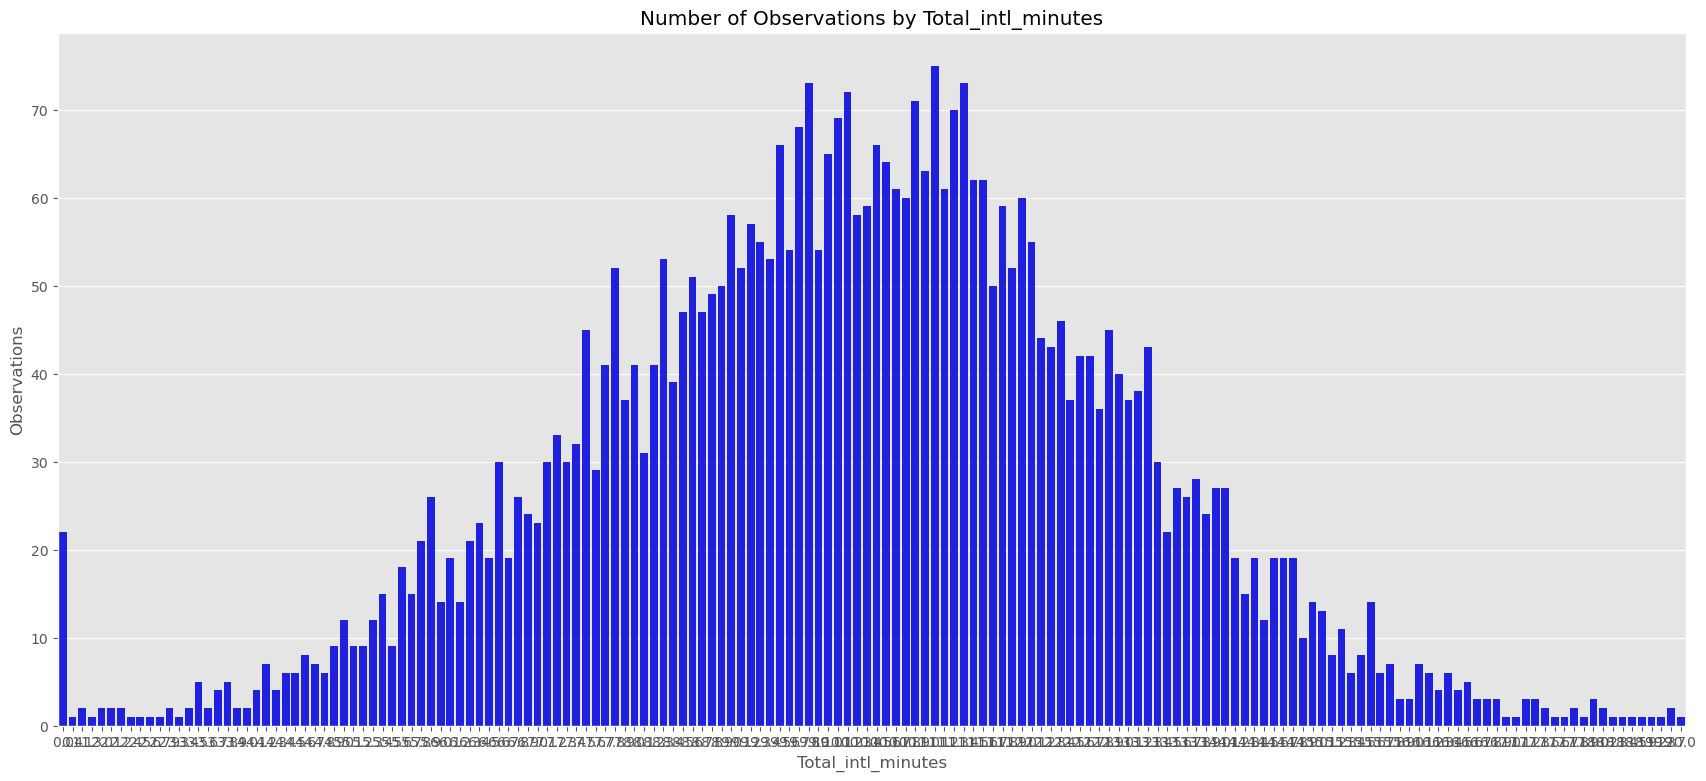

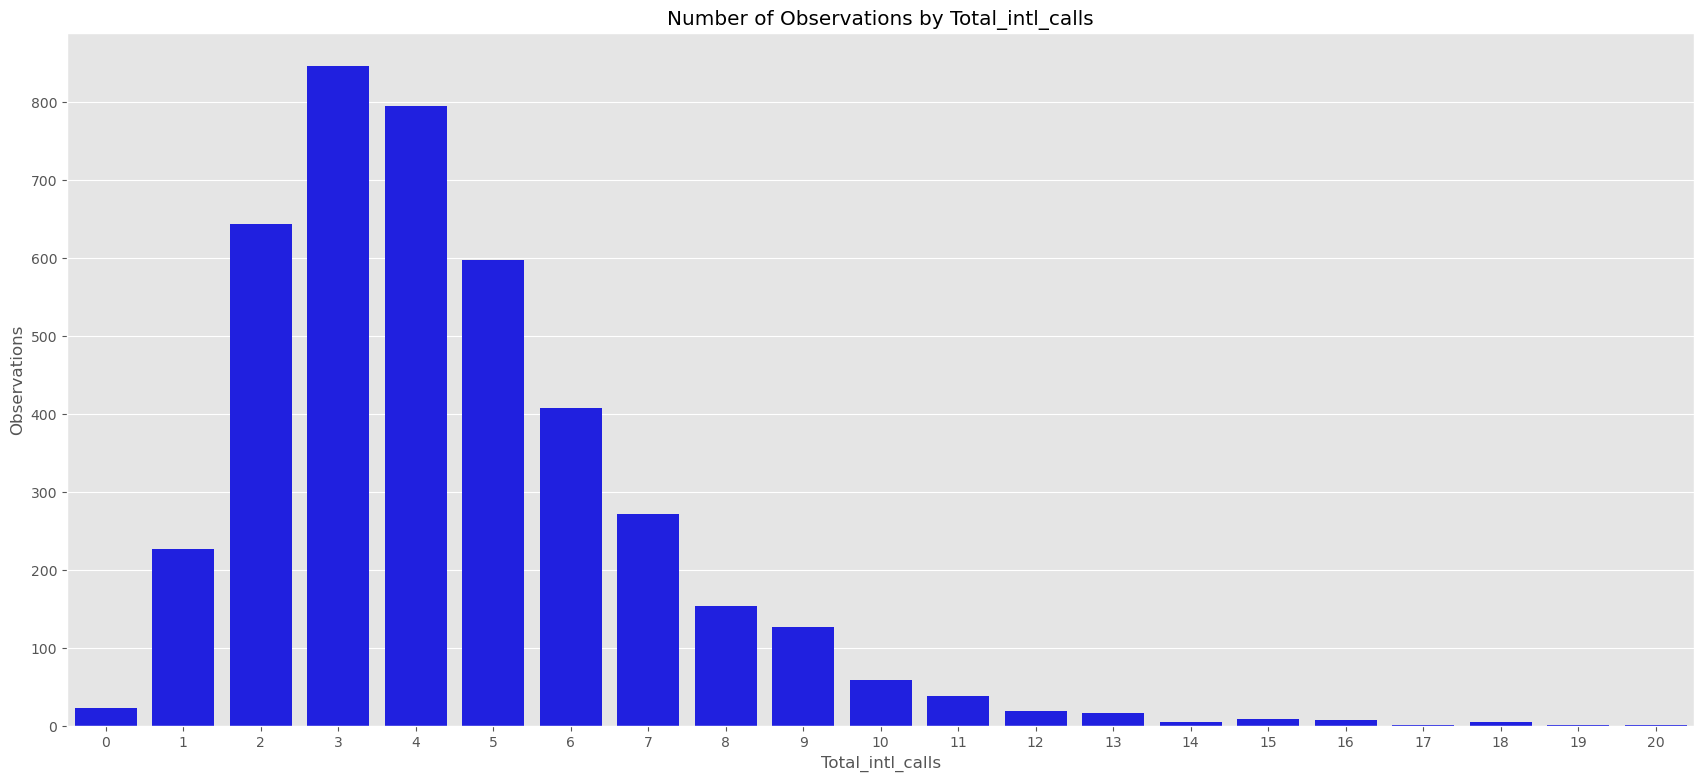

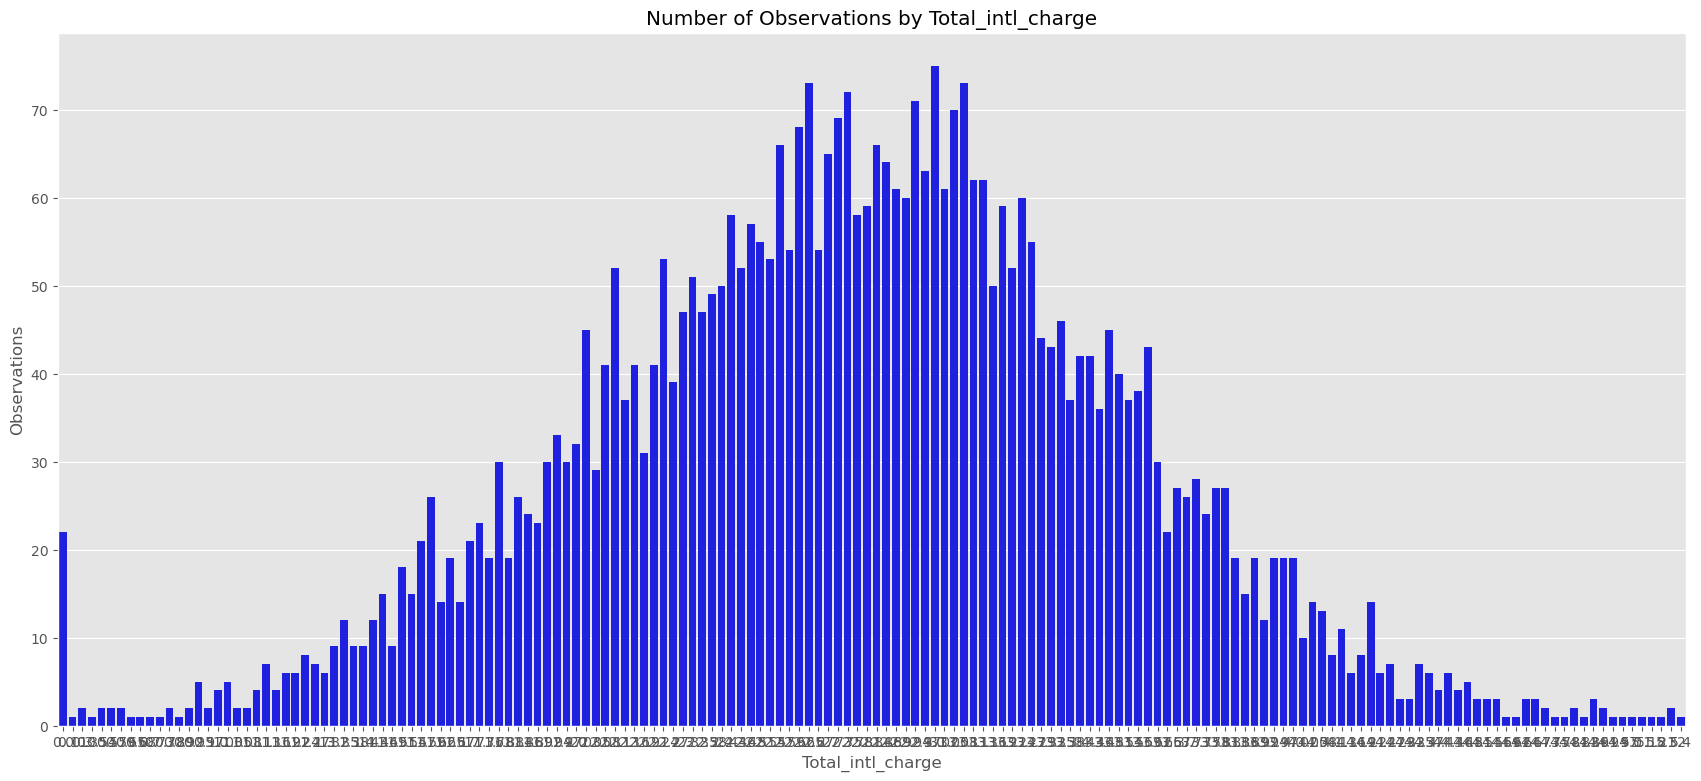

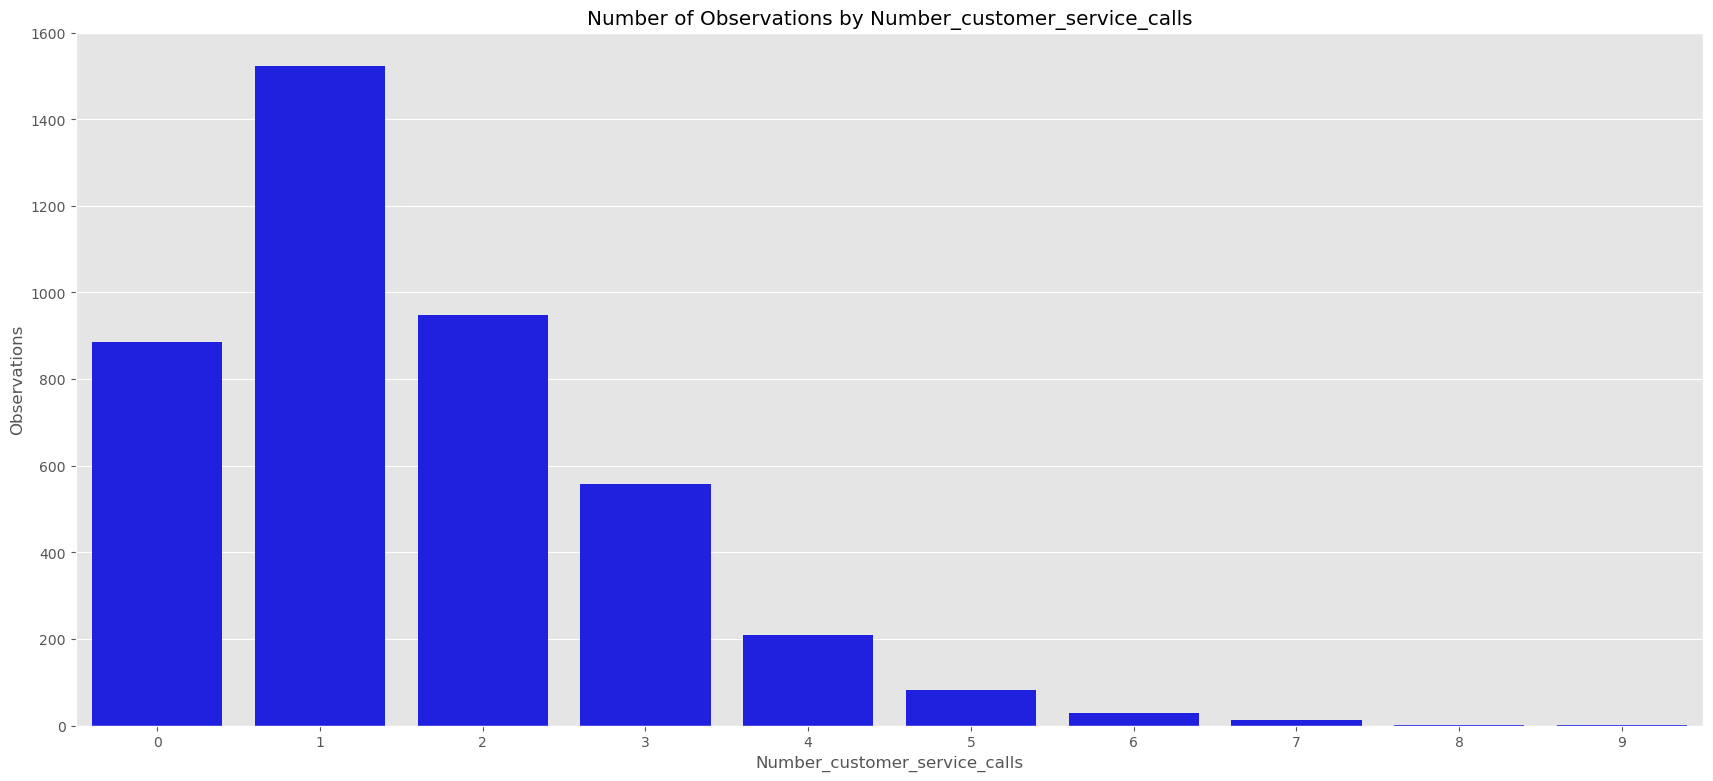

In [13]:
for col in numerical_cols:
    num_plot_count(df_clean, col)

# CATEGORICAL COLUMNS

In [14]:
for column in categorical_cols:
        print("Column: {} - Unique Values: {}".format(column, df_raw[column].unique()))
        print("")
        print("="*80)
        print("")

Column: state - Unique Values: ['KS' 'MT' 'NE' 'OH' 'NY' 'HI' 'NH' 'SD' 'MD' 'NM' 'RI' 'VA' 'OR' 'IA'
 'ID' 'CO' 'KY' 'FL' 'WV' 'CA' 'WI' 'VT' 'SC' 'AL' 'DE' 'MI' 'NC' 'PA'
 'AK' 'ND' 'TN' 'NJ' 'WY' 'MN' 'CT' 'LA' 'ME' 'TX' 'UT' 'OK' 'NV' 'MA'
 'WA' 'MS' 'GA' 'IL' 'DC' 'AZ' 'IN' 'AR' 'MO']


Column: area_code - Unique Values: ['area_code_510' 'area_code_415' 'area_code_408']


Column: international_plan - Unique Values: ['no' 'yes']


Column: voice_mail_plan - Unique Values: ['no' 'yes']


Column: churn - Unique Values: ['no' 'yes']




In [15]:
def cat_plot_count(df, column_name, color='skyblue', rotation_angle=45):

    counts = df[column_name].value_counts()

    fig, ax = plt.subplots()
    counts.plot(kind='bar', ax=ax, color=color)

    for i in ax.patches:
        ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 1, str(i.get_height()), ha='center', va='bottom')

    ax.set_xlabel(column_name.capitalize())
    ax.set_ylabel('Count')
    ax.set_title(f'Histogram of {column_name.capitalize()}')

    plt.xticks(rotation=rotation_angle, ha='right')

    plt.tight_layout()
    plt.show()

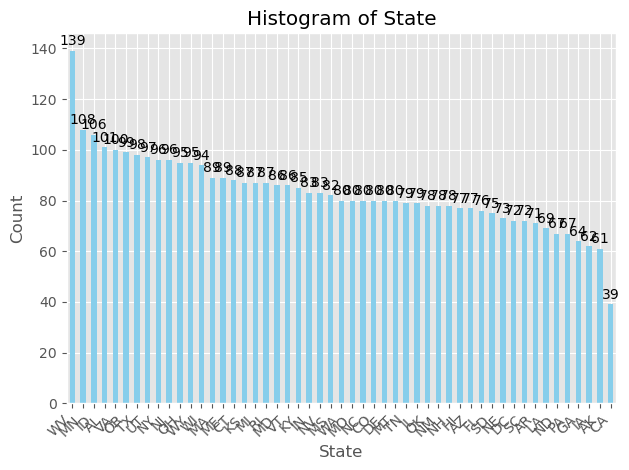

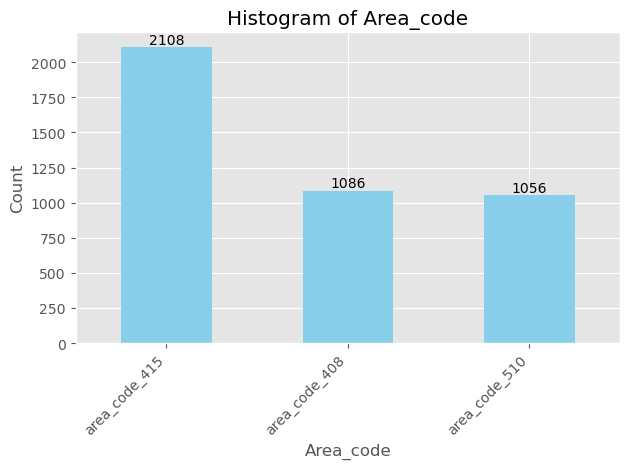

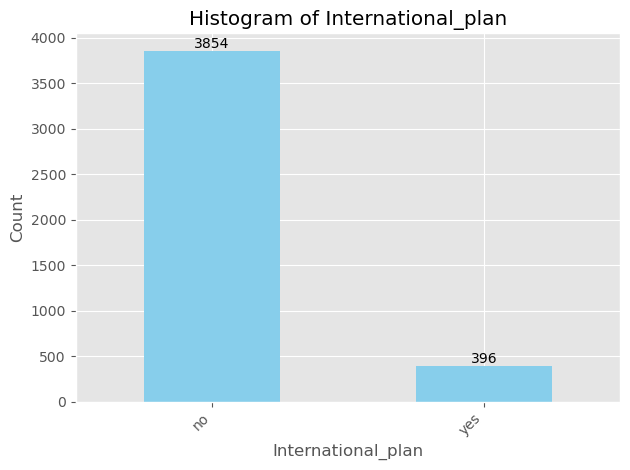

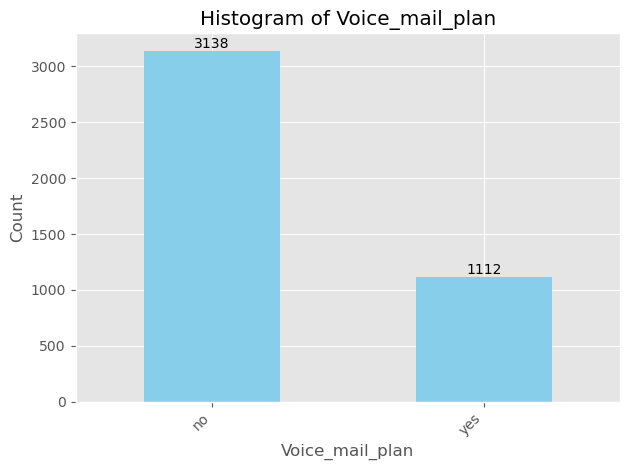

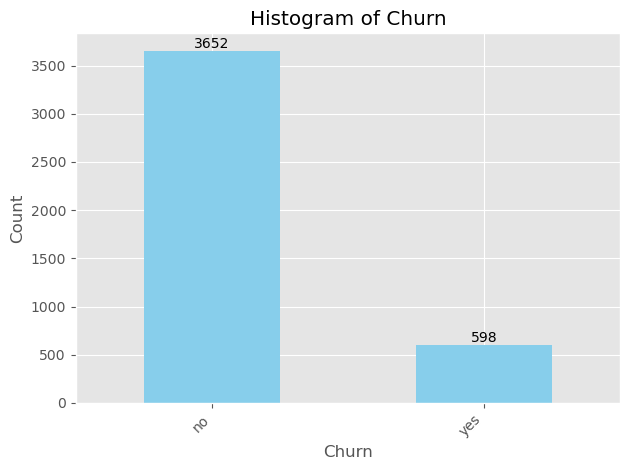

In [16]:
for col in categorical_cols:
    cat_plot_count(df_clean, col)

In [17]:
df_clean['international_plan'] = df_clean['international_plan'].map({'yes': 1, 'no': 0})
df_clean['voice_mail_plan'] = df_clean['voice_mail_plan'].map({'yes': 1, 'no': 0})
df_clean['churn'] = df_clean['churn'].map({'yes': 1, 'no': 0})

In [18]:
for col in categorical_cols:
    df_clean[col]=df_clean[col].astype("category")

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4250 entries, 1024 to 860
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   state                          4250 non-null   category
 1   account_length                 4250 non-null   int64   
 2   area_code                      4250 non-null   category
 3   international_plan             4250 non-null   category
 4   voice_mail_plan                4250 non-null   category
 5   number_vmail_messages          4250 non-null   int64   
 6   total_day_minutes              4250 non-null   float64 
 7   total_day_calls                4250 non-null   int64   
 8   total_day_charge               4250 non-null   float64 
 9   total_eve_minutes              4250 non-null   float64 
 10  total_eve_calls                4250 non-null   int64   
 11  total_eve_charge               4250 non-null   float64 
 12  total_night_minutes            4250 n

In [20]:
df_clean = df_clean.drop('area_code', axis=1)
df_clean = df_clean.drop('state', axis=1)

y = df_clean['churn']
df_clean.drop(columns=['churn'], inplace=True)
X = df_clean.copy()

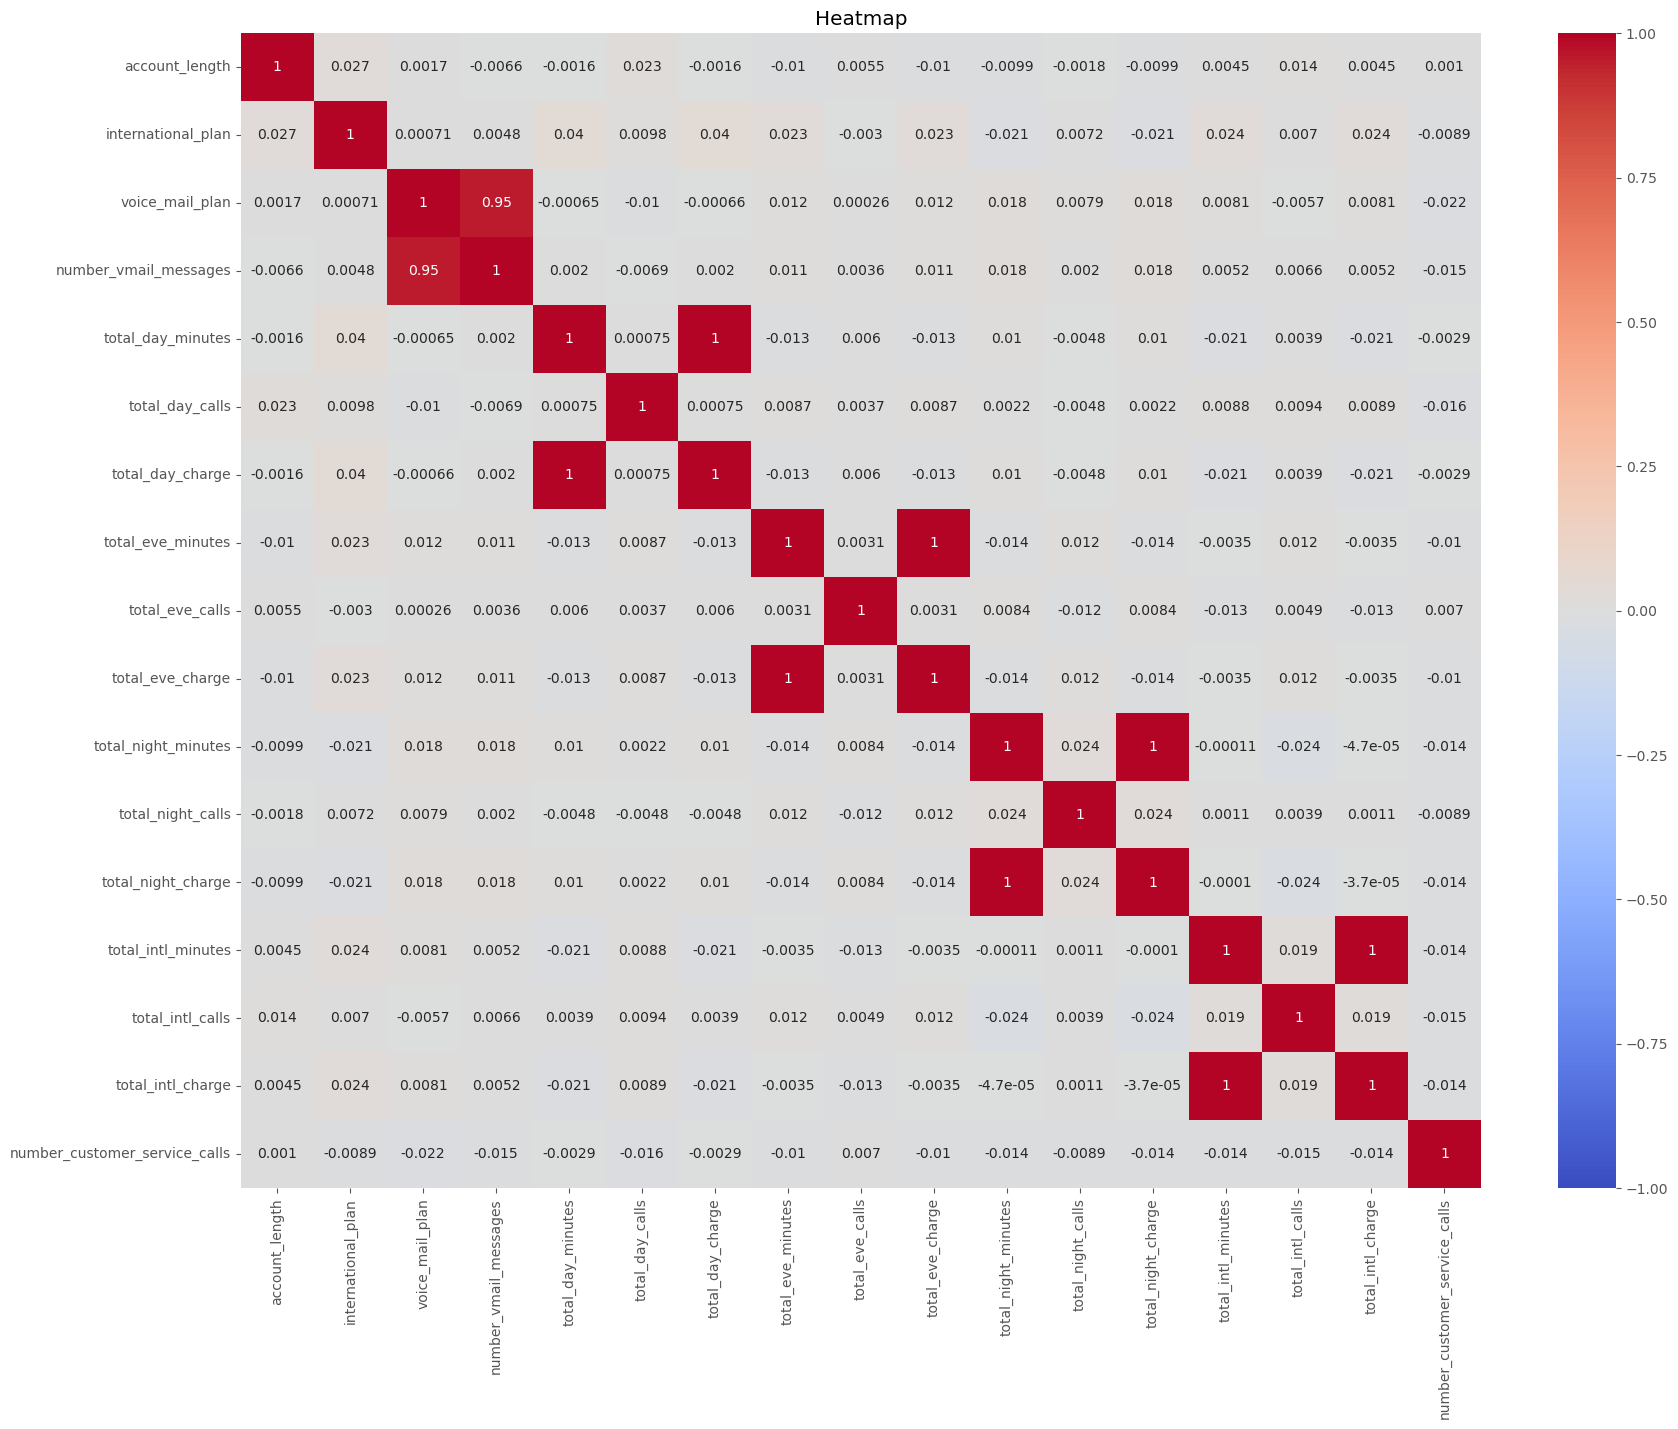

In [21]:
correlation_matrix = X.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap')
plt.show()

In [22]:
X = X.drop('number_vmail_messages', axis=1)
X = X.drop('total_day_charge', axis=1)
X = X.drop('total_eve_charge', axis=1)
X = X.drop('total_night_charge', axis=1)
X = X.drop('total_intl_charge', axis=1)

In [23]:
print(X.shape)
print(y.shape)

(4250, 12)
(4250,)


In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4250 entries, 1024 to 860
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   account_length                 4250 non-null   int64   
 1   international_plan             4250 non-null   category
 2   voice_mail_plan                4250 non-null   category
 3   total_day_minutes              4250 non-null   float64 
 4   total_day_calls                4250 non-null   int64   
 5   total_eve_minutes              4250 non-null   float64 
 6   total_eve_calls                4250 non-null   int64   
 7   total_night_minutes            4250 non-null   float64 
 8   total_night_calls              4250 non-null   int64   
 9   total_intl_minutes             4250 non-null   float64 
 10  total_intl_calls               4250 non-null   int64   
 11  number_customer_service_calls  4250 non-null   int64   
dtypes: category(2), float64(4), int64(6)


# TRAIN-TEST SPLIT

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [26]:
print(y_train.value_counts())

churn
0    2922
1     478
Name: count, dtype: int64


In [27]:
oversampler = RandomOverSampler(sampling_strategy = 0.8, random_state=42)

X_train_res, y_train_res = oversampler.fit_resample(X_train, y_train)

print("-- before --")
print(X_train.shape)
print(y_train.shape)
print(y_train.value_counts())

print("")

print("-- after --")
print(X_train_res.shape)
print(y_train_res.shape)
print(y_train_res.value_counts())

NameError: name 'RandomOverSampler' is not defined

In [ ]:
X_train = X_train_res
y_train = y_train_res

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### XGBOOST

In [ ]:
train_dmatrix = xgb.DMatrix(data=X_train, label=y_train, enable_categorical=True)

N_FOLDS = 10

def objective(params, n_folds = N_FOLDS):
    params['objective'] = 'binary:logistic'

    cv_results = xgb.cv(
        dtrain=train_dmatrix,
        params=params,
        nfold=n_folds,
        num_boost_round=10000,
        early_stopping_rounds=100, 
        metrics="auc",
        as_pandas=True,
        seed=42
    )

    loss = 1 - cv_results["test-auc-mean"].iloc[-1]
    n_estimators = cv_results["test-auc-mean"].idxmax() + 1
    return {'loss': loss, 'params': params, 'n_estimators': n_estimators, 'status': STATUS_OK}

In [ ]:
hyperparameter_space = {
    'n_jobs': -1,
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 0.8),
    'subsample': hp.uniform('subsample', 0.6, 0.8),
    'min_child_weight': hp.quniform('min_child_weight', 1, 7, 2),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'max_depth': hp.randint('max_depth', 1,16),
    'gamma': hp.uniform('gamma', 0.1,0.4),
    'max_delta_step': hp.randint('max_delta_step',0,10),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2))
}

In [ ]:
bayes_trials = Trials()

In [ ]:
MAX_EVALS = 15

best = fmin(fn = objective, space = hyperparameter_space, algo = tpe.suggest, max_evals = MAX_EVALS, trials = bayes_trials)

100%|██████████| 15/15 [1:33:34<00:00, 374.29s/trial, best loss: 0.0007794964165703799] 


In [ ]:
xgb_best = xgb.XGBClassifier(**best, tree_method="hist", enable_categorical=True)

xgb_best.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6197003593600848, device=None,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, feature_types=None, gamma=0.12255827095438547,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.07379196628970099,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=4, max_depth=14, max_leaves=None,
              min_child_weight=2.0, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

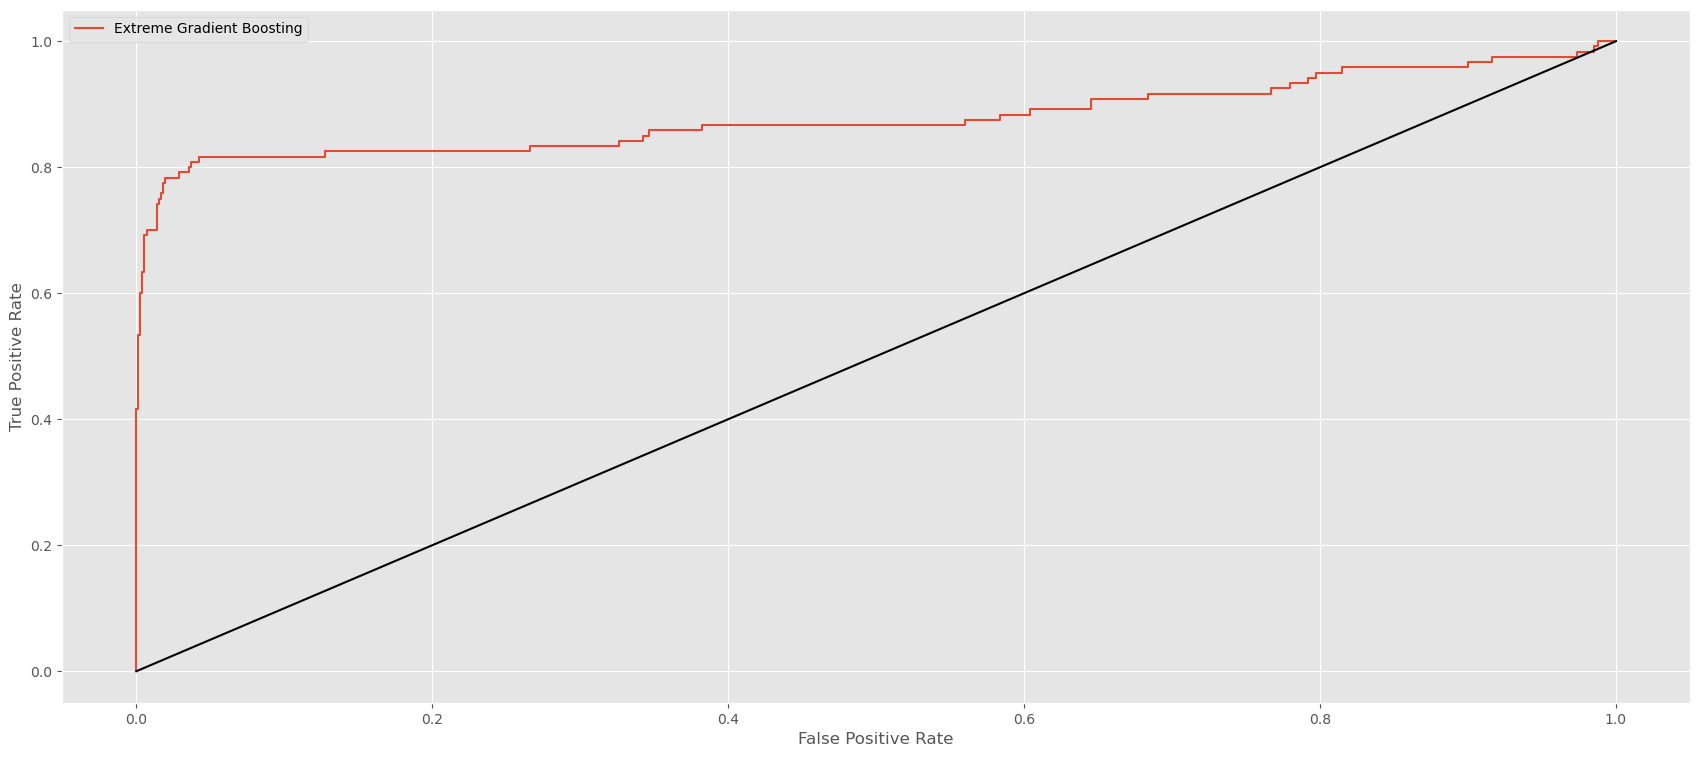

In [ ]:
def add_roc_plot(model, test_x, test_y, legend_text):
    y_pred_prob = model.predict_proba(test_x)[:, 1]
    fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob)
    plt.plot(fpr, tpr, label=legend_text)
    plt.legend()

models_list = [xgb_best]
model_names = ['Extreme Gradient Boosting']

plt.figure(figsize=(21, 9))
[add_roc_plot(model, X_test, y_test, legend_text) for model, legend_text in zip(models_list, model_names)]

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k-")
plt.show()

In [ ]:
list_scores = [roc_auc_score, recall_score, precision_score, accuracy_score]
calc_scores = []

def compute_scores(model, x_test, y_test, scores):
    return [round(score(y_test, model.predict(x_test)), 2) for score in scores]
    
[calc_scores.append(compute_scores(model, X_test, y_test, list_scores)) for model in models_list] 

score_names = ['roc_auc', 'recall', 'precision', 'accuracy']
scores_df = pd.DataFrame(calc_scores, columns=score_names, index=model_names)

scores_df

,roc_auc,recall,precision,accuracy
Extreme Gradient Boosting,0.88,0.78,0.86,0.95


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

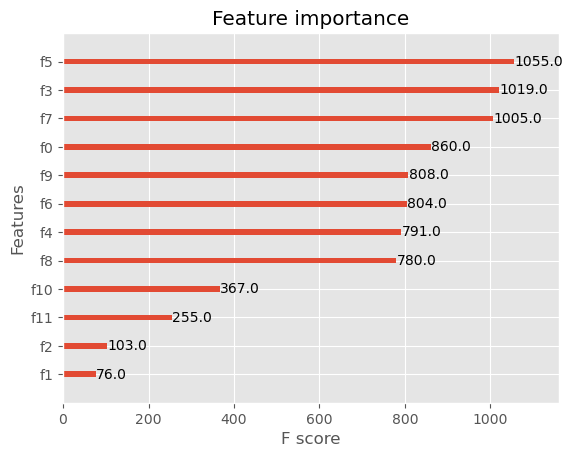

In [ ]:
xgb.plot_importance(xgb_best)

### Random Forest

In [ ]:
def objective(params):
    clf = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    clf.fit(X_train, y_train)
    pred = clf.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, pred)
    return {'loss': -auc, 'status': STATUS_OK}

In [ ]:
param_space = {
    'n_estimators': hp.choice('n_estimators', [100, 200, 300, 400, 500]),
    'max_depth': hp.choice('max_depth', np.arange(5, 20, dtype=int)),
    'min_samples_split': hp.choice('min_samples_split', [2, 5, 10]),
    'min_samples_leaf': hp.choice('min_samples_leaf', [1, 2, 4]),
    'max_features': hp.choice('max_features', ['sqrt', 'log2'])
}

In [ ]:
tpe_algorithm = tpe.suggest
bayes_trials = Trials()

MAX_EVALS = 20
best_param_indices = fmin(fn=objective, space=param_space, algo=tpe_algorithm, max_evals=MAX_EVALS, trials=bayes_trials)

100%|██████████| 20/20 [00:19<00:00,  1.03trial/s, best loss: -0.8865867579908676]


In [ ]:
best_params = {
    'n_estimators': [100, 200, 300, 400, 500][best_param_indices['n_estimators']],
    'max_depth': np.arange(5, 20, dtype=int)[best_param_indices['max_depth']],
    'min_samples_split': [2, 5, 10][best_param_indices['min_samples_split']],
    'min_samples_leaf': [1, 2, 4][best_param_indices['min_samples_leaf']],
    'max_features': ['sqrt', 'log2'][best_param_indices['max_features']]
}

rf_best = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300, n_jobs=-1, random_state=42)

In [ ]:
print(rf_best)

RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300, n_jobs=-1, random_state=42)


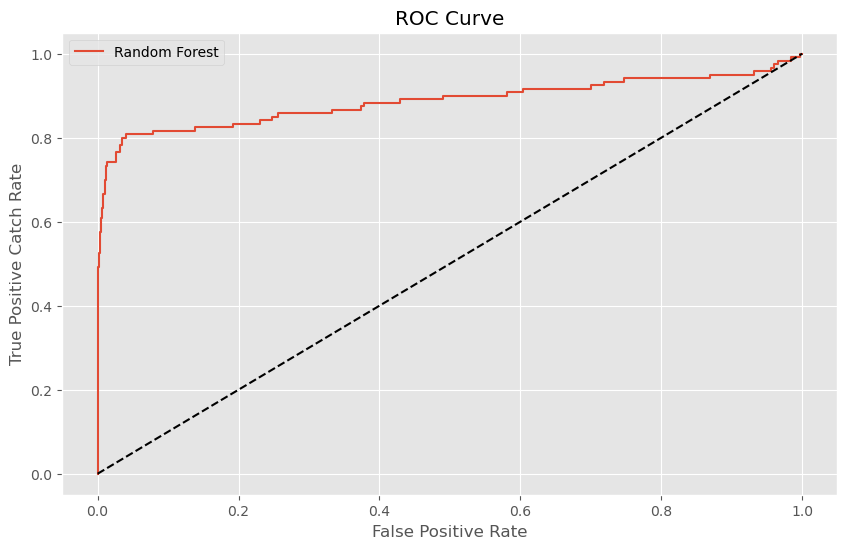

               roc_auc  recall  precision  accuracy
Random Forest     0.88    0.81       0.73      0.93


In [ ]:
plt.figure(figsize=(10, 6))
add_roc_plot(rf_best, X_test, y_test, 'Random Forest')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Catch Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve")
plt.show()

def compute_scores(model, x_test, y_test, scores):
    return [round(score(y_test, model.predict(x_test)), 2) for score in scores]

scores_list = [roc_auc_score, recall_score, precision_score, accuracy_score]
model_scores = compute_scores(rf_best, X_test, y_test, scores_list)
score_names = ['roc_auc', 'recall', 'precision', 'accuracy']
scores_df = pd.DataFrame([model_scores], columns=score_names, index=['Random Forest'])

print(scores_df)

### CATBOOSTCLASSIFIER

In [ ]:
from catboost import CatBoostClassifier, Pool

cat_features_indices = [1, 2]  # Indices for 'international_plan' and 'voice_mail_plan'

catboost_train_data = Pool(X_train, y_train)#, cat_features=cat_features_indices)
catboost_test_data = Pool(X_test, y_test)#, cat_features=cat_features_indices)

catboost_model = CatBoostClassifier(
    iterations=100,
    depth=3,
    learning_rate=1,
    loss_function='Logloss',
    verbose=True
)

catboost_model.fit(catboost_train_data)

preds_class = catboost_model.predict(catboost_test_data)
preds_proba = catboost_model.predict_proba(catboost_test_data)


0:	learn: 0.4605774	total: 151ms	remaining: 15s
1:	learn: 0.4059827	total: 153ms	remaining: 7.51s
2:	learn: 0.3849433	total: 154ms	remaining: 4.99s
3:	learn: 0.3545751	total: 156ms	remaining: 3.73s
4:	learn: 0.3348799	total: 157ms	remaining: 2.98s
5:	learn: 0.3246959	total: 158ms	remaining: 2.48s
6:	learn: 0.3197787	total: 159ms	remaining: 2.12s
7:	learn: 0.3131252	total: 161ms	remaining: 1.85s
8:	learn: 0.3037161	total: 162ms	remaining: 1.64s
9:	learn: 0.2988656	total: 163ms	remaining: 1.47s
10:	learn: 0.2942160	total: 165ms	remaining: 1.33s
11:	learn: 0.2865048	total: 167ms	remaining: 1.22s
12:	learn: 0.2787599	total: 168ms	remaining: 1.13s
13:	learn: 0.2651077	total: 169ms	remaining: 1.04s
14:	learn: 0.2558890	total: 170ms	remaining: 966ms
15:	learn: 0.2524838	total: 172ms	remaining: 900ms
16:	learn: 0.2475060	total: 173ms	remaining: 843ms
17:	learn: 0.2440959	total: 174ms	remaining: 791ms
18:	learn: 0.2391714	total: 175ms	remaining: 745ms
19:	learn: 0.2355269	total: 176ms	remaining

## LOGISTIC REGRESSION

In [ ]:
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

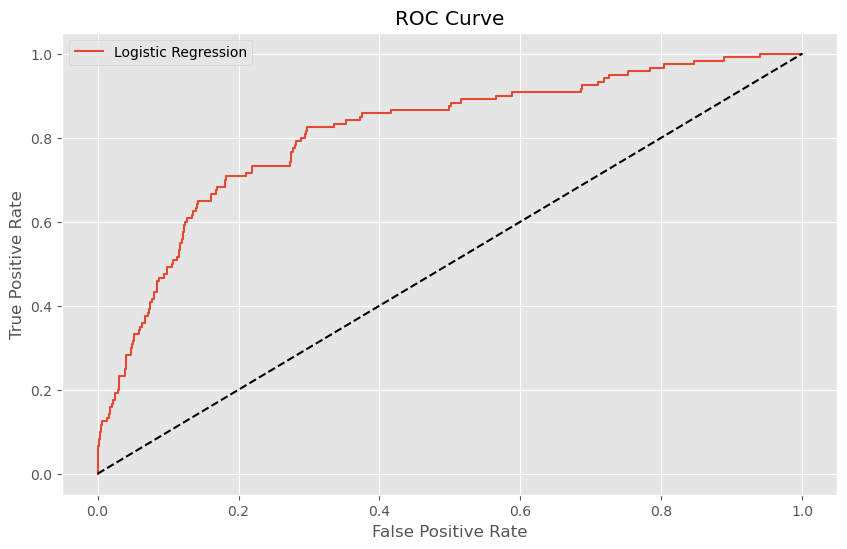

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Results

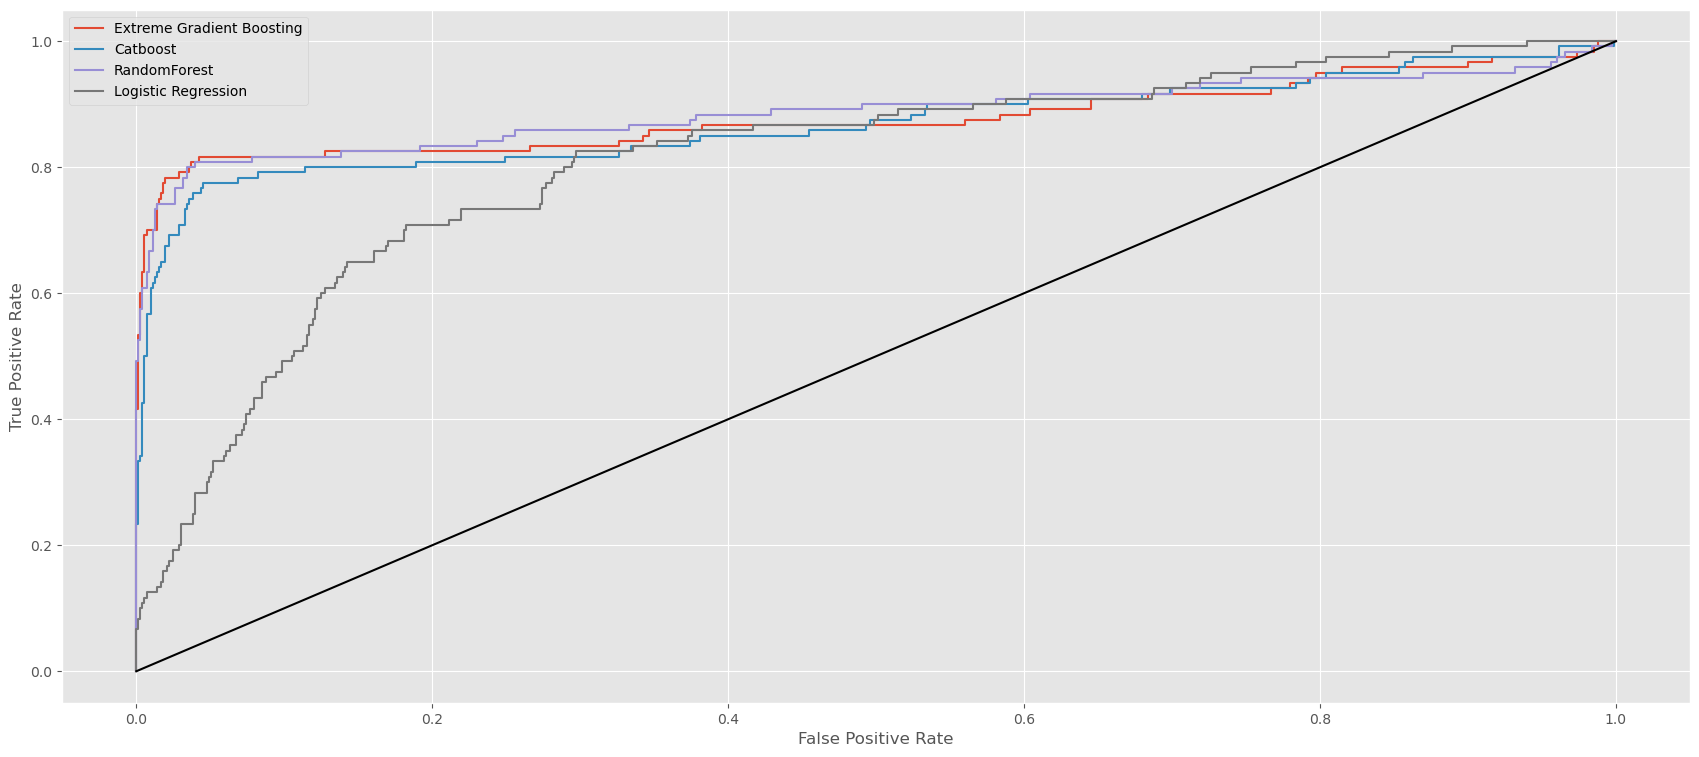

In [ ]:
models_list = [xgb_best, catboost_model, rf_best, log_reg]
model_names = ['Extreme Gradient Boosting', 'Catboost', 'RandomForest', 'Logistic Regression']

plt.figure(figsize=(21, 9))
[add_roc_plot(model, X_test, y_test, legend_text) for model, legend_text in zip(models_list, model_names)]

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k-")
plt.show()

In [ ]:
list_scores = [roc_auc_score, recall_score, precision_score, accuracy_score]
calc_scores = []
def compute_scores(model, x_test, y_test, scores):
    return [round(score(y_test, model.predict(x_test)), 2) for score in scores]
    
[calc_scores.append(compute_scores(model, X_test, y_test, list_scores)) for model in models_list] 

score_names = ['roc_auc', 'recall', 'precision', 'accuracy']
scores_df = pd.DataFrame(calc_scores, columns=score_names, index=model_names)

scores_df

,roc_auc,recall,precision,accuracy
Extreme Gradient Boosting,0.88,0.78,0.86,0.95
Catboost,0.86,0.75,0.77,0.93
RandomForest,0.88,0.81,0.73,0.93
Logistic Regression,0.75,0.72,0.36,0.78
